# Minneapolis Real Estate Analysis

John Dunlap, Jacob Sampson, Kory Krattiger


## Overview

### Business Problem

Create a Dynamic Pricing tool that will predict the actual home sale price, given all the features of a home and key factors that affect real estate prices. Explore trends in the housing market in Minnesota in 2020.

### Objective Goals

We will develop a model for predicting home sale prices based on the explanatory features from each house. We will explore the trends in the features as they relate to the home sale price, in an effort to support real estate agents and home buyers/sellers understand the market and value of different homes.

Data taken on features of homes from the Minnesota housing market from 2020.


## Data

### Load Data

In [ ]:
# Load data from shared Google Drive link
!pip install gdown
!gdown https://drive.google.com/uc?id=1EJCRL3qHvNrRm1hIfGEwP6jFjzUu_viD
!gdown https://drive.google.com/uc?id=1klRjkcA0ghWDw11rlJu60HZ4ILxwzJaf

Downloading...
From: https://drive.google.com/uc?id=1EJCRL3qHvNrRm1hIfGEwP6jFjzUu_viD
To: /content/mls_properties.csv
53.5MB [00:00, 170MB/s]
Downloading...
From: https://drive.google.com/uc?id=1klRjkcA0ghWDw11rlJu60HZ4ILxwzJaf
To: /content/mls_quality.csv
57.7MB [00:00, 158MB/s]


In [ ]:
import pandas as pd

# Load data
df_properties = pd.read_csv('mls_properties.csv', na_values='None')
df_qualities = pd.read_csv('mls_quality.csv', na_values='', sep='\t')

## Exploratory Data Analysis

### Feature Extraction and Creation

In [ ]:
df_properties.columns

Index(['pid', 'sell_date', 'sell_price', 'list_price', 'mls', 'address_long',
       'zip_code', 'built', 'city', 'county', 'property_type', 'num_bath',
       'num_bed', 'fin_sqft', 'above_gd_sqft', 'below_gd_sqft', 'appliances',
       'num_fireplaces', 'basement_details', 'common_wall', 'heating', 'ac',
       'amenities', 'ext_material', 'num_garage_spaces', 'foundation_size',
       'handicap', 'out_buildings', 'pool', 'quarter_baths', 'half_baths',
       'threequarter_baths', 'full_baths', 'dining', 'family_room', 'lot',
       'lat', 'lng', 'zoning', 'school_district', 'association_fee',
       'tax_year', 'annual_taxes', 'fuel', 'sewer', 'water'],
      dtype='object')

In [ ]:
df_properties.describe()

pid    sell_price  ...       tax_year  annual_taxes
count  1.029560e+05  1.028890e+05  ...  102664.000000  9.950400e+04
mean   5.570916e+06  3.035790e+05  ...    2019.502640  3.214985e+03
std    1.244084e+05  2.167592e+05  ...      12.702204  3.197621e+04
min    2.313672e+06  1.000000e+00  ...       0.000000  1.000000e+00
25%    5.541609e+06  1.850000e+05  ...    2019.000000  1.600000e+03
50%    5.609526e+06  2.690000e+05  ...    2020.000000  2.662000e+03
75%    5.654417e+06  3.700000e+05  ...    2020.000000  3.876000e+03
max    5.729325e+06  4.189000e+06  ...    2021.000000  9.999999e+06

[8 rows x 24 columns]

In [ ]:
df_properties.head()

pid   sell_date  sell_price  ...              fuel                sewer water
0  5648469  03/08/2021   4189000.0  ...        NaturalGas  CitySewer/Connected  Well
1  5543377  03/15/2021   4175000.0  ...        NaturalGas         PrivateSewer  Well
2  5564746  07/02/2020   4050000.0  ...  NaturalGas:Other  CitySewer/Connected  Well
3  5475977  04/24/2020   4016162.0  ...               NaN                  NaN   NaN
4  5620644  09/15/2020   3995000.0  ...        NaturalGas         PrivateSewer  Well

[5 rows x 46 columns]

In [ ]:
df_properties.shape

(102956, 46)

In [ ]:
df_properties.dtypes

pid                     int64
sell_date              object
sell_price            float64
list_price            float64
mls                   float64
address_long           object
zip_code              float64
built                 float64
city                   object
county                 object
property_type          object
num_bath              float64
num_bed               float64
fin_sqft              float64
above_gd_sqft         float64
below_gd_sqft         float64
appliances             object
num_fireplaces        float64
basement_details       object
common_wall            object
heating                object
ac                     object
amenities              object
ext_material           object
num_garage_spaces     float64
foundation_size       float64
handicap               object
out_buildings          object
pool                   object
quarter_baths         float64
half_baths            float64
threequarter_baths    float64
full_baths            float64
dining    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7fb218ad0>,
      dtype=object)

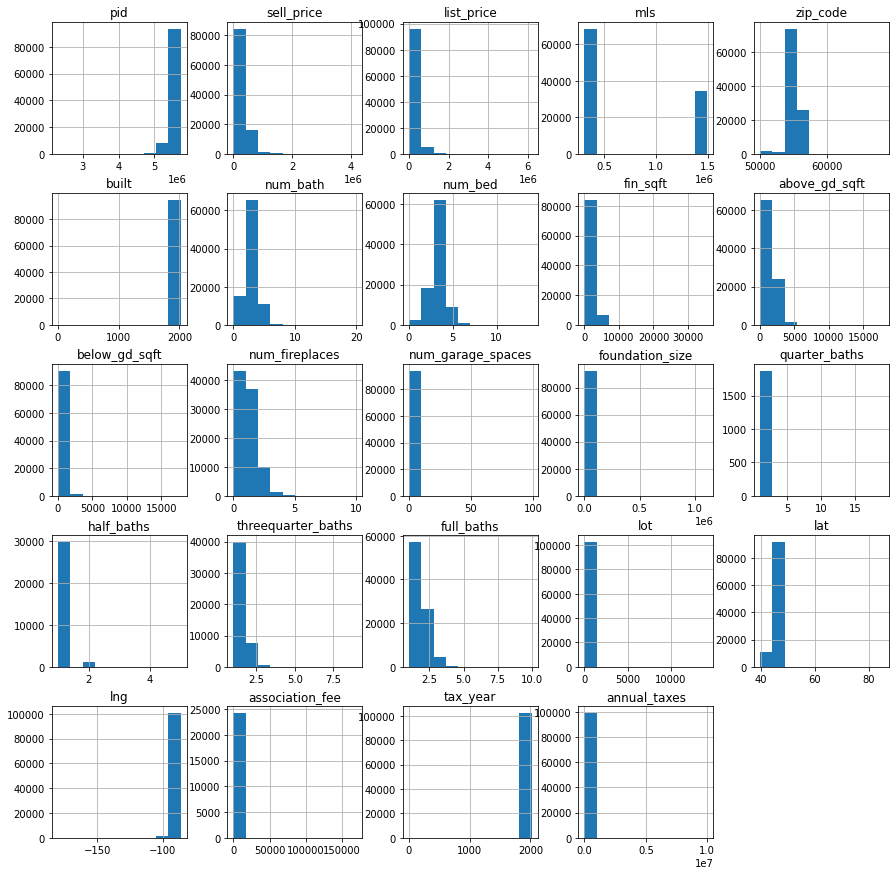

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 15]
df_properties.hist()

In [ ]:
df_properties.dtypes

pid                     int64
sell_date              object
sell_price            float64
list_price            float64
mls                   float64
address_long           object
zip_code              float64
built                 float64
city                   object
county                 object
property_type          object
num_bath              float64
num_bed               float64
fin_sqft              float64
above_gd_sqft         float64
below_gd_sqft         float64
appliances             object
num_fireplaces        float64
basement_details       object
common_wall            object
heating                object
ac                     object
amenities              object
ext_material           object
num_garage_spaces     float64
foundation_size       float64
handicap               object
out_buildings          object
pool                   object
quarter_baths         float64
half_baths            float64
threequarter_baths    float64
full_baths            float64
dining    

In [ ]:
# Remove unneccesary columns
df_properties.drop(['mls', 'address_long'], axis=1, inplace=True)

#### Categorical Columns

In [ ]:
# Categorical columns
categorical_columns = [
  'zip_code',
  'city',
  'county',
  'school_district',
  'property_type',
]

In [ ]:
# List (categorical) columns
list_columns = [
  'water',
  'fuel',
  'sewer',
  'dining',
  'appliances',
  'basement_details',
  'heating',
  'ac',
  'pool',
  'amenities',
  'ext_material',
  'handicap',
  'out_buildings',
  'family_room',
  'zoning',
]

def explode_list_columns(col, index):
  from sklearn.preprocessing import MultiLabelBinarizer

  mlb = MultiLabelBinarizer(sparse_output=True)

  return pd.DataFrame.sparse.from_spmatrix(
      mlb.fit_transform(col.apply(lambda x: str(x).split(':'))),
      index=index,
      columns=mlb.classes_)

In [ ]:
import seaborn as sns
import scipy.stats as stats
import numpy as np

def mapplot(df, column, title, bins=None, formatter=lambda x: x, is_zoomed_in=False, show_legend=True):
  f, ax = plt.subplots(1, 1, figsize=(10, 10))

  # Remove outliers
  z_scores = stats.zscore(df['lat'], nan_policy='omit')
  abs_z_scores = np.abs(z_scores)
  df = df[(abs_z_scores < 3)]
  z_scores = stats.zscore(df['lng'], nan_policy='omit')
  abs_z_scores = np.abs(z_scores)
  df = df[(abs_z_scores < 3)]

  if bins:
    df[column] = pd.cut(
        df[column],
        bins=bins,
        right=True,
        labels=list(map(formatter, bins[1:])))
  
  if is_zoomed_in:
    df = df[(df['lat'] < 45.5) & (df['lat'] > 44.5) & (df['lng'] < -92.8) & (df['lng'] > -93.8)]

  sns.scatterplot(
      data=df[['lat', 'lng', column]].sort_values(column, ascending=True).dropna().reset_index(),
      x='lat',
      y='lng',
      hue=column,
      size=1,
      alpha=0.5,
      legend='brief' if show_legend else False,
      ax=ax
  )
  if show_legend:
    plt.legend(title=title)
    h,l = ax.get_legend_handles_labels()
    ax.legend(h[0:-1],l[0:-1], loc=2)
  plt.xlabel('Latitude')
  plt.ylabel('Longitude')
  plt.title(title)
  f.tight_layout()
  plt.show()


In [ ]:
df_properties

pid   sell_date  ...                sewer                water
0       5648469  03/08/2021  ...  CitySewer/Connected                 Well
1       5543377  03/15/2021  ...         PrivateSewer                 Well
2       5564746  07/02/2020  ...  CitySewer/Connected                 Well
3       5475977  04/24/2020  ...                  NaN                  NaN
4       5620644  09/15/2020  ...         PrivateSewer                 Well
...         ...         ...  ...                  ...                  ...
102951  5677597  12/01/2020  ...  CitySewer/Connected  CityWater/Connected
102952  5571254  12/14/2020  ...  CitySewer/Connected  CityWater/Connected
102953  5499991  09/11/2020  ...  CitySewer/Connected  CityWater/Connected
102954  5582190  09/15/2020  ...         PrivateSewer              Private
102955  5681737  11/02/2020  ...                  NaN                  NaN

[102956 rows x 44 columns]

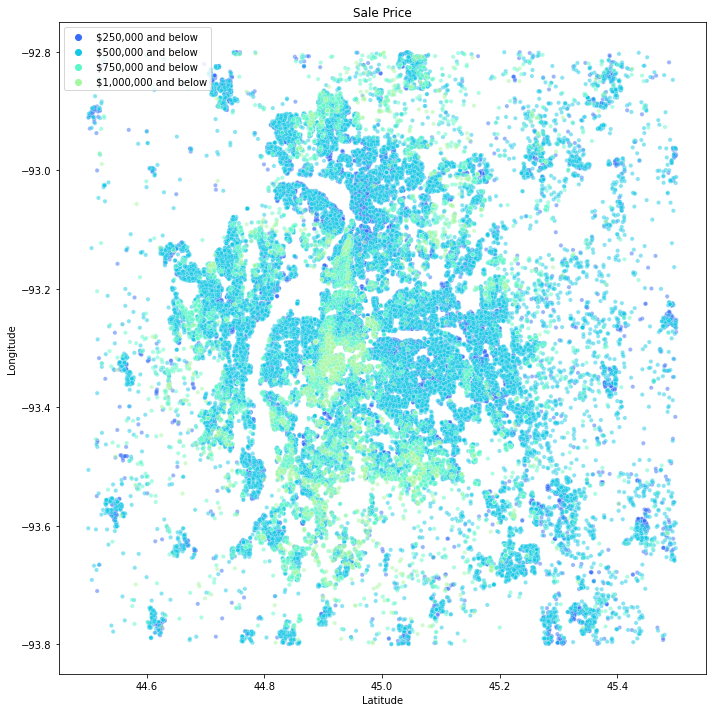

In [ ]:
import seaborn as sns
sns.set_palette("rainbow")

mapplot(
  df_properties,
  'sell_price',
  'Sale Price',
  [100000,250000,500000,750000,1000000],   # Bins
  lambda x: '${:,.0f} and below'.format(x), # Formatter
  True
)

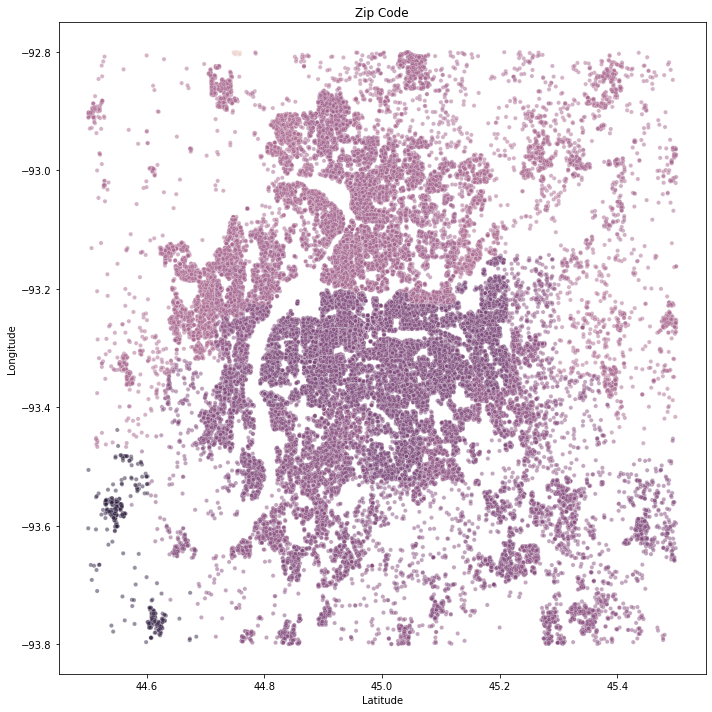

In [ ]:
mapplot(
  df_properties,
  'zip_code',
  'Zip Code',
  is_zoomed_in=True,
  show_legend=False
)

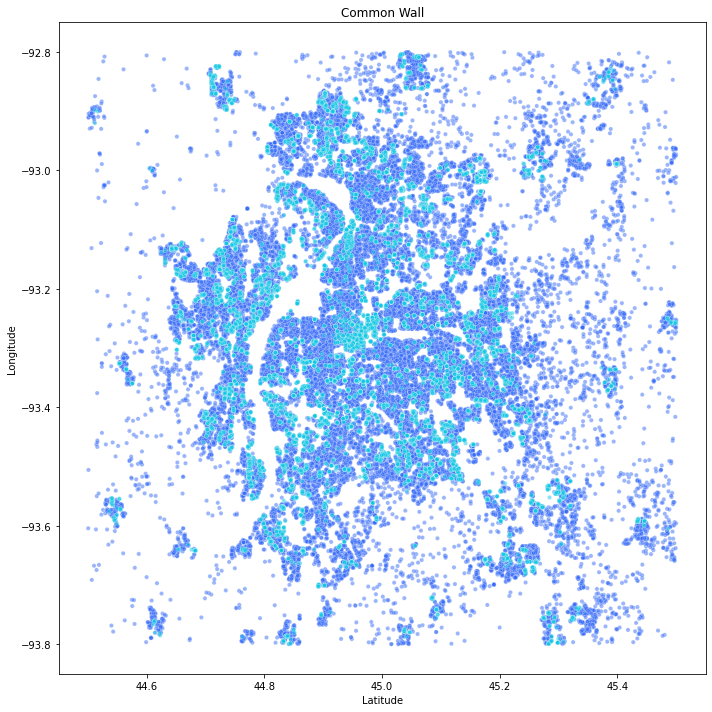

In [ ]:
mapplot(
  df_properties,
  'common_wall',
  'Common Wall',
  is_zoomed_in=True,
  show_legend=False
)

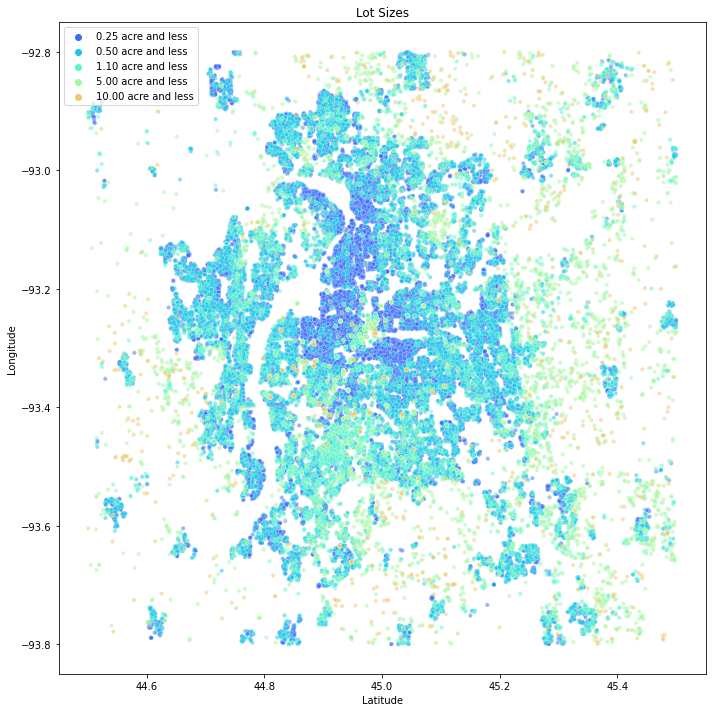

In [ ]:
mapplot(
  df_properties,
  'lot',
  'Lot Sizes',
  [0, 0.25, 0.5, 1.1, 5.0, 10.0], # Bins
  lambda x: '{:.2f} acre and less'.format(x), # Formatter
  True
)

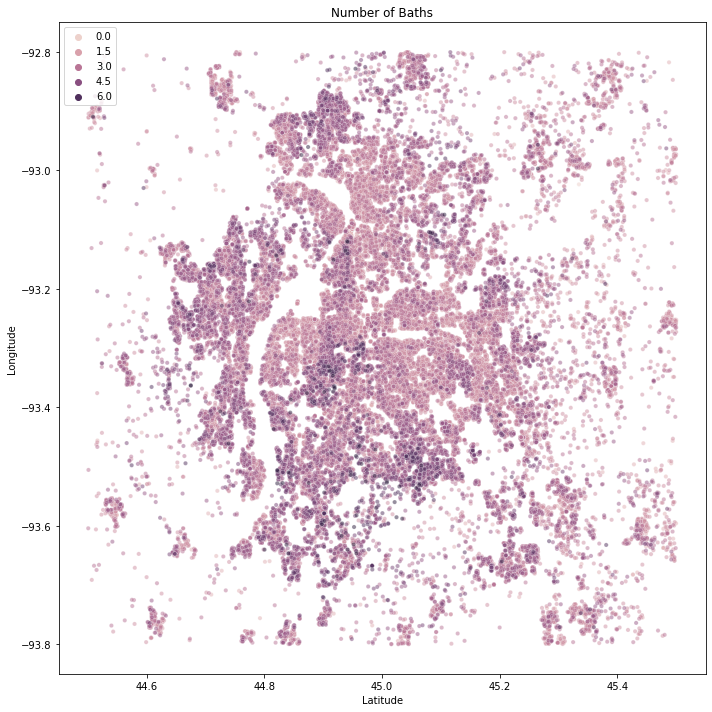

In [ ]:
mapplot(
  df_properties[df_properties['num_bath'] < 8],
  'num_bath',
  'Number of Baths',
  is_zoomed_in=True
)

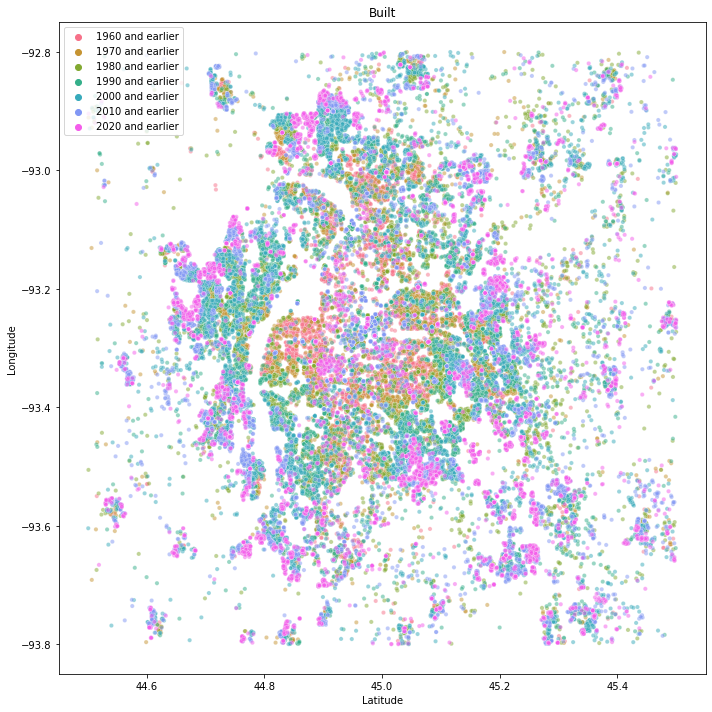

In [ ]:
mapplot(
  df_properties,
  'built',
  'Built',
  [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], # Bins
  lambda x: '{:.0f} and earlier'.format(x), # Formatter
  True
)

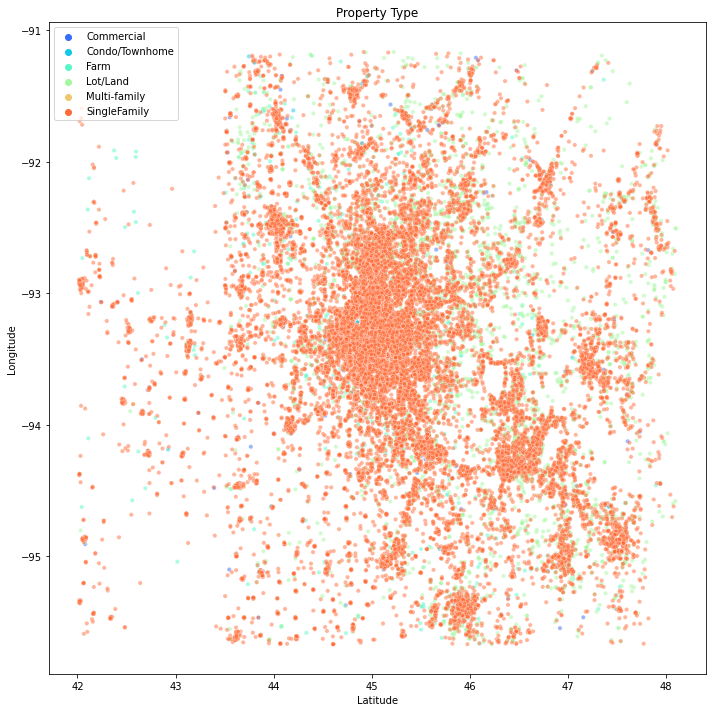

In [ ]:
mapplot(df_properties, 'property_type', 'Property Type')

In [ ]:
df_properties['property_type'].value_counts()

SingleFamily      75243
Condo/Townhome    16336
Lot/Land           7397
Multi-family       2235
Commercial         1046
Farm                632
Name: property_type, dtype: int64

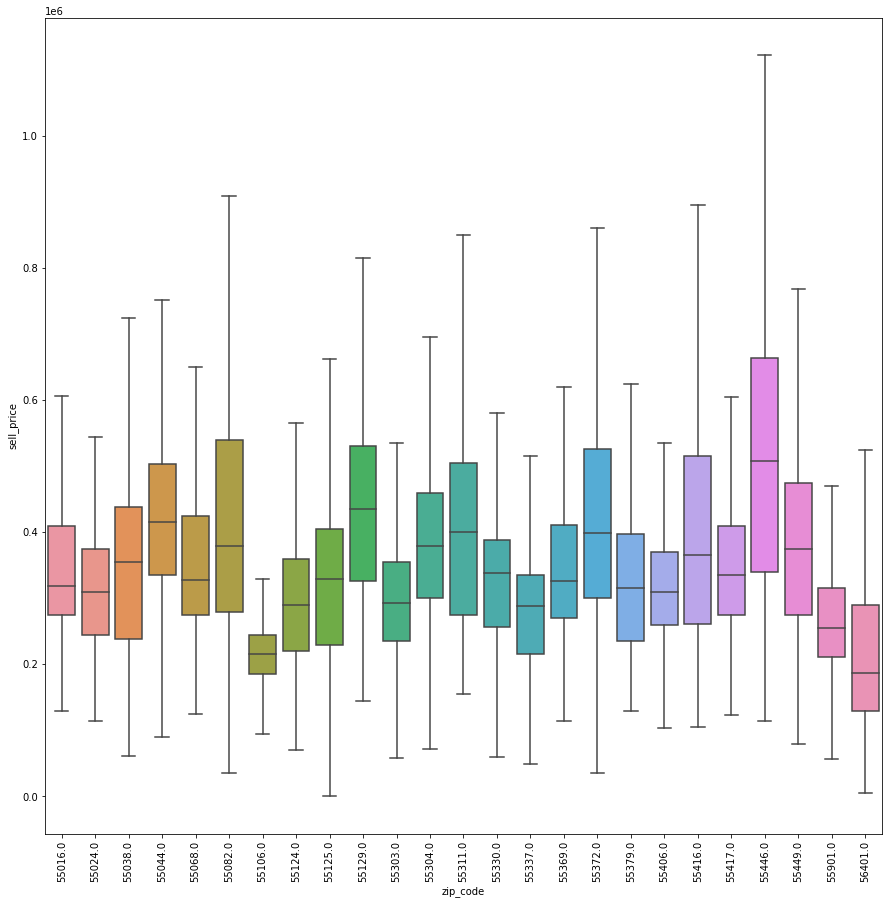

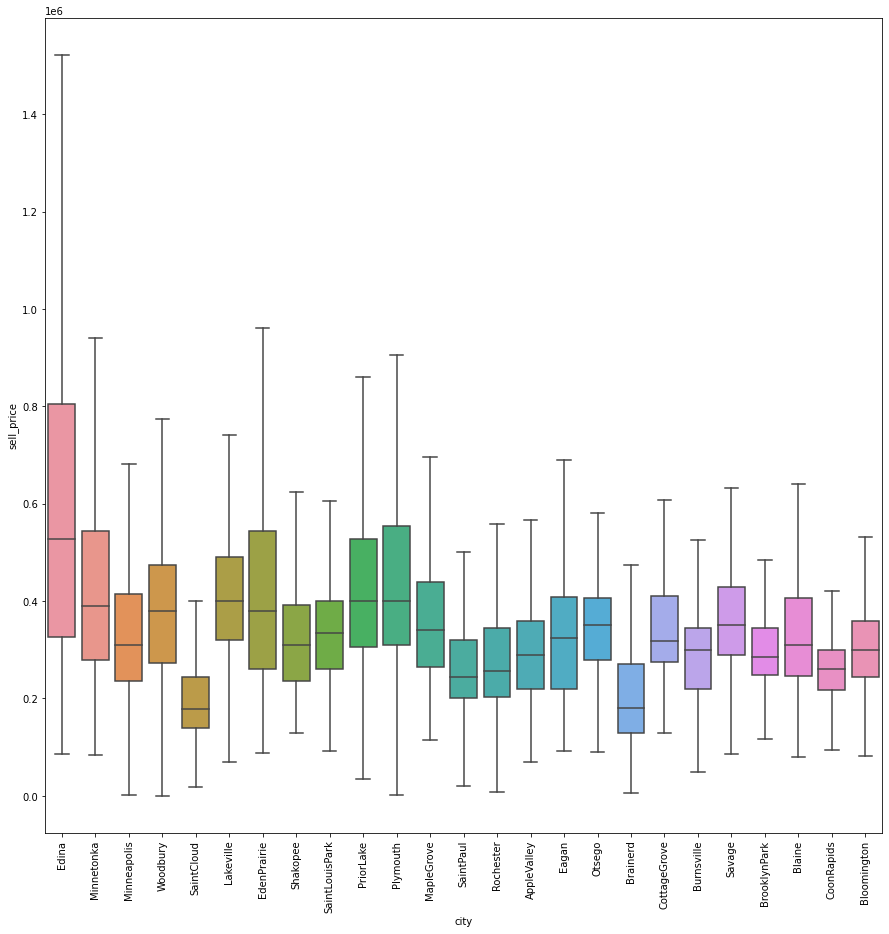

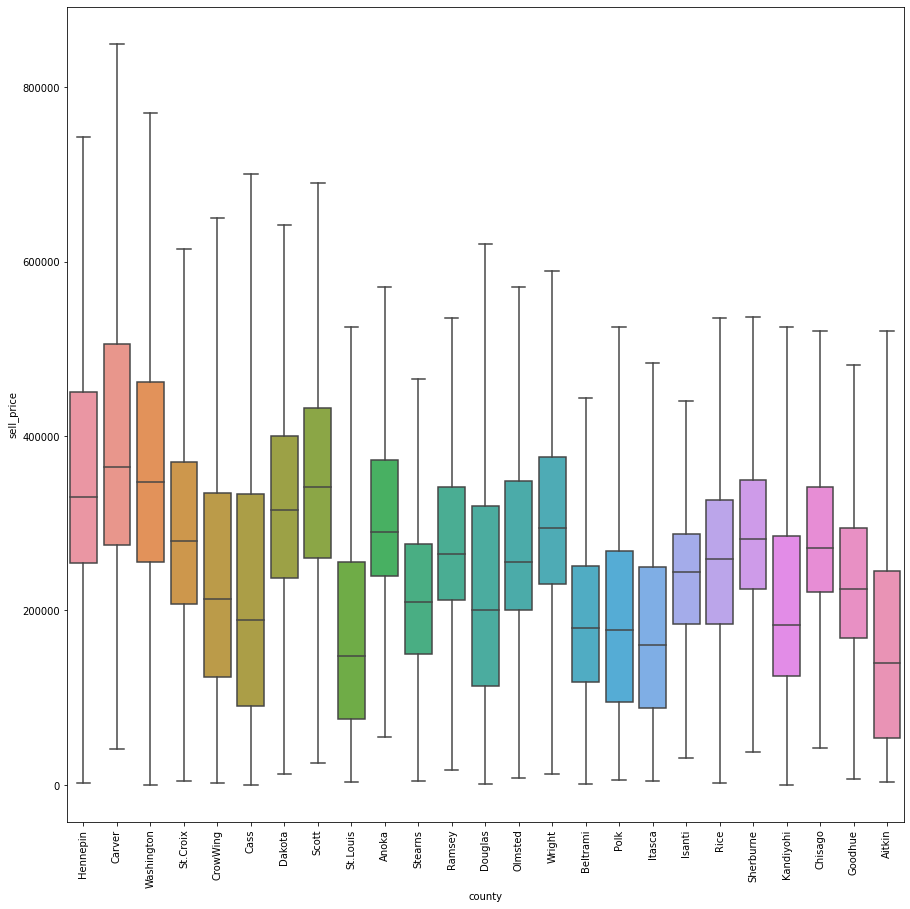

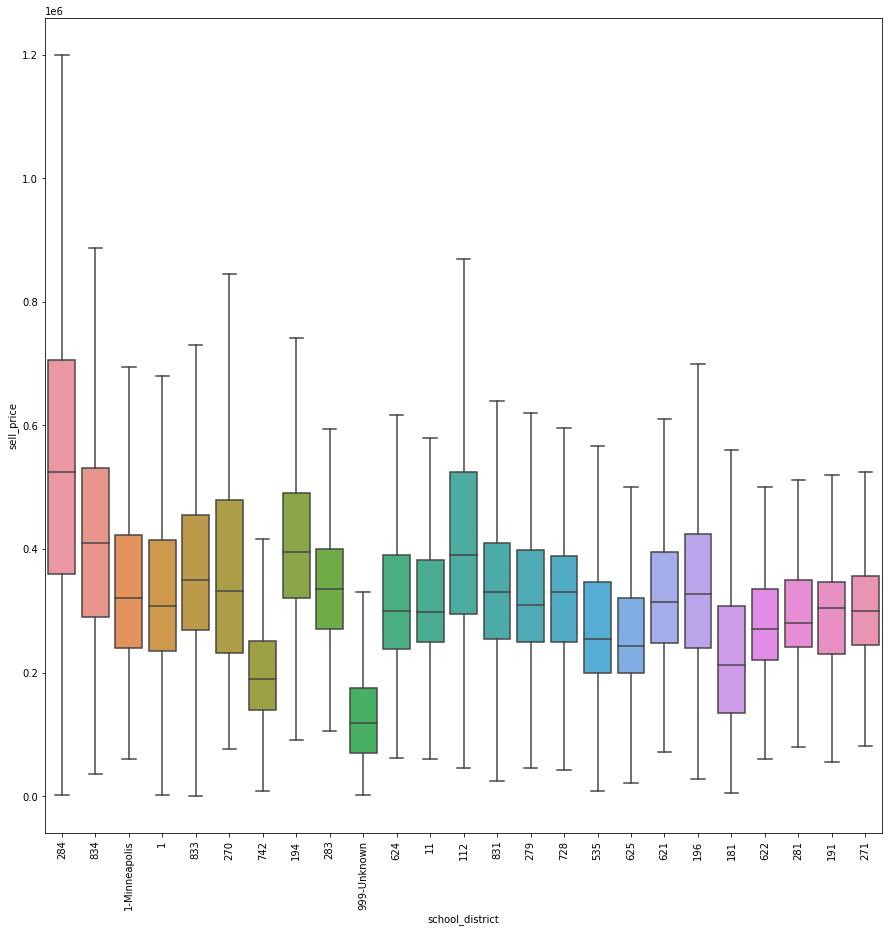

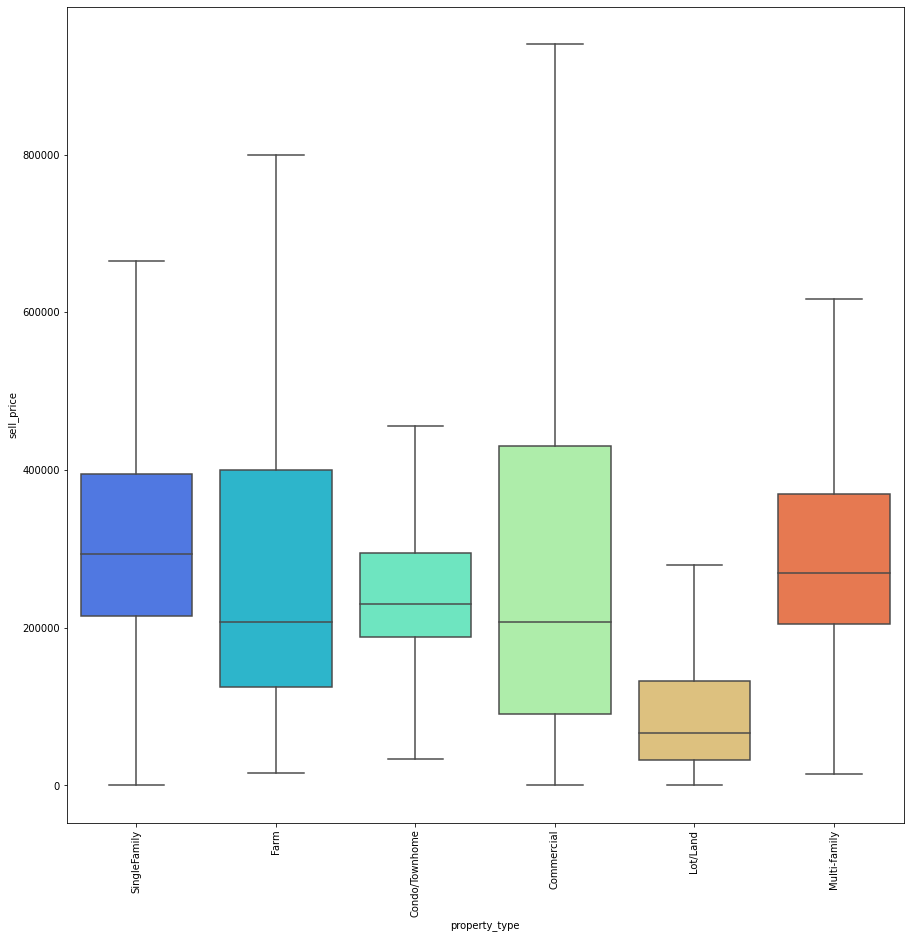

In [ ]:
import seaborn as sns
# Print views of each category
for column in categorical_columns:
  limited_columns = df_properties[column].value_counts().index.values[0:25]
  sns.boxplot(
      data=df_properties[df_properties[column].isin(limited_columns)],
      x=column,
      y='sell_price',
      showfliers=False
  )
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
# Convert school districts to district number
print(df_properties[pd.to_numeric(df_properties['school_district'], 'coerce').isna()]['school_district'].value_counts())
df_properties['school_district'] = pd.to_numeric(
    df_properties['school_district'].apply(lambda x: x if isinstance(x, float) == 'float' else str(x).split('-')[0]),
    'coerce'
)
print(df_properties['school_district'].value_counts())

999-Unknown                1214
1-Minneapolis               945
11-Anoka-Hennepin           753
625-St.Paul                 646
279-Osseo                   476
                           ... 
2854-Ada-Borup                1
511-Adrian                    1
698-Floodwood                 1
362-Littlefork-BigFalls       1
32-Blackduck                  1
Name: school_district, Length: 369, dtype: int64
1.0       6756
11.0      4859
625.0     4334
279.0     3057
196.0     2818
          ... 
2215.0       1
356.0        1
5460.0       1
245.0        1
3409.0       1
Name: school_district, Length: 413, dtype: int64


In [ ]:
for column in list_columns + categorical_columns:
  print('%s:\n%s\n' % (column, df_properties[column].apply(lambda x: str(x).split(':')).explode().value_counts()[0:10]))

water:
CityWater/Connected    76090
Well                   14605
nan                     8809
Private                 4304
Drilled                 3191
CityWater-InStreet      1644
4-InchSubmersible       1144
SharedSystem            1044
SandPoint                697
Rural/Municipality       264
Name: water, dtype: int64

fuel:
NaturalGas    81722
Propane        8783
nan            8670
Electric       6377
Wood           1630
Oil             767
Other           630
Pellet          127
Solar            75
Name: fuel, dtype: int64

sewer:
CitySewer/Connected      77383
PrivateSewer             10505
nan                       8812
TankwithDrainageField     4727
Private                   2302
MoundSeptic               1967
CitySewer-InStreet        1557
HoldingTank                531
SharedSeptic               497
Mound                      381
Name: sewer, dtype: int64

dining:
InformalDiningRoom           32452
nan                          27846
EatInKitchen                 27800
Kitchen

In [ ]:
num_exploded = 0
PERC_THRESHOLD = 0.05
MAX_NUM_ADDED = 25

# Data frame with binarized categories
df_properties_binarized = {}

for column in list_columns + categorical_columns:
  # Explode the categorical lists into one-hot-encoded columns
  exploded = explode_list_columns(df_properties[column], df_properties.index)

  # Limit number of added columns
  # limited_columns = (exploded.sum() / len(exploded)).loc[lambda x : x > PERC_THRESHOLD].index.values
  limited_columns = (exploded.sum() / len(exploded)).sort_values(ascending=False)[0:MAX_NUM_ADDED].index.values
  print('%s: %s' % (column, limited_columns))
  exploded = exploded[limited_columns]

  df_properties_binarized[column] = exploded
  exploded.columns = f'{column}__' + exploded.columns.str.lower()

  num_exploded += len(exploded.columns.values)

  df_properties.drop(column, axis=1, inplace=True)
  df_properties = df_properties.join(exploded)

print(f'Number of exploded columns: {num_exploded}')

water: ['CityWater/Connected' 'Well' 'nan' 'Private' 'Drilled'
 'CityWater-InStreet' '4-InchSubmersible' 'SharedSystem' 'SandPoint'
 'Rural/Municipality' 'Other' 'Rural' 'LakeWater' 'Artesian' 'Dug']
fuel: ['NaturalGas' 'Propane' 'nan' 'Electric' 'Wood' 'Oil' 'Other' 'Pellet'
 'Solar']
sewer: ['CitySewer/Connected' 'PrivateSewer' 'nan' 'TankwithDrainageField'
 'Private' 'MoundSeptic' 'CitySewer-InStreet' 'HoldingTank' 'SharedSeptic'
 'Mound' 'HoldingTanks' 'Other' 'SharedSystem' 'Outhouse' 'Compost']
dining: ['InformalDiningRoom' 'nan' 'EatInKitchen' 'Kitchen/DiningRoom'
 'Separate/FormalDiningRoom' 'Living/DiningRoom' 'BreakfastArea'
 'BreakfastBar' 'Other' 'Living/Dinin']
appliances: ['Refrigerator' 'Range' 'Dishwasher' 'Washer' 'Dryer' 'Microwave'
 'Disposal' 'WaterSoftenerOwned' 'ExhaustFan' 'nan' 'GasWaterHeater'
 'Cooktop' 'Air-To-AirExchanger' 'WallOven' 'Humidifier' 'Freezer'
 'WaterSoftener-Owned' 'ExhaustFan/Hood' 'ElectricWaterHeater'
 'WaterFiltrationSystem' 'CentralVacuum'

In [ ]:
df_properties

pid   sell_date  ...  property_type__farm  property_type__nan
0       5648469  03/08/2021  ...                    0                   0
1       5543377  03/15/2021  ...                    0                   0
2       5564746  07/02/2020  ...                    0                   0
3       5475977  04/24/2020  ...                    1                   0
4       5620644  09/15/2020  ...                    0                   0
...         ...         ...  ...                  ...                 ...
102951  5677597  12/01/2020  ...                    0                   0
102952  5571254  12/14/2020  ...                    0                   0
102953  5499991  09/11/2020  ...                    0                   0
102954  5582190  09/15/2020  ...                    0                   0
102955  5681737  11/02/2020  ...                    0                   0

[102956 rows x 392 columns]

In [ ]:
import seaborn as sns
def one_hot_boxplot(features, output, x, y):
  df = features.join(output)
  df = pd.melt(df,
    id_vars=[output.name],
    value_vars = df.columns[0:-1],
    var_name = x,
    value_name = 'count'
  ).query('count > 0').drop('count', 1)

  # sorted_index = df.mean().sort_values().index
  # df = df[sorted_index]

  sns.boxplot(
    data=df,
    y=output.name,
    x=x,
    width=0.5,
    showfliers=False
  )

  plt.xticks(rotation=90)
  plt.ylabel(y)

  plt.show()

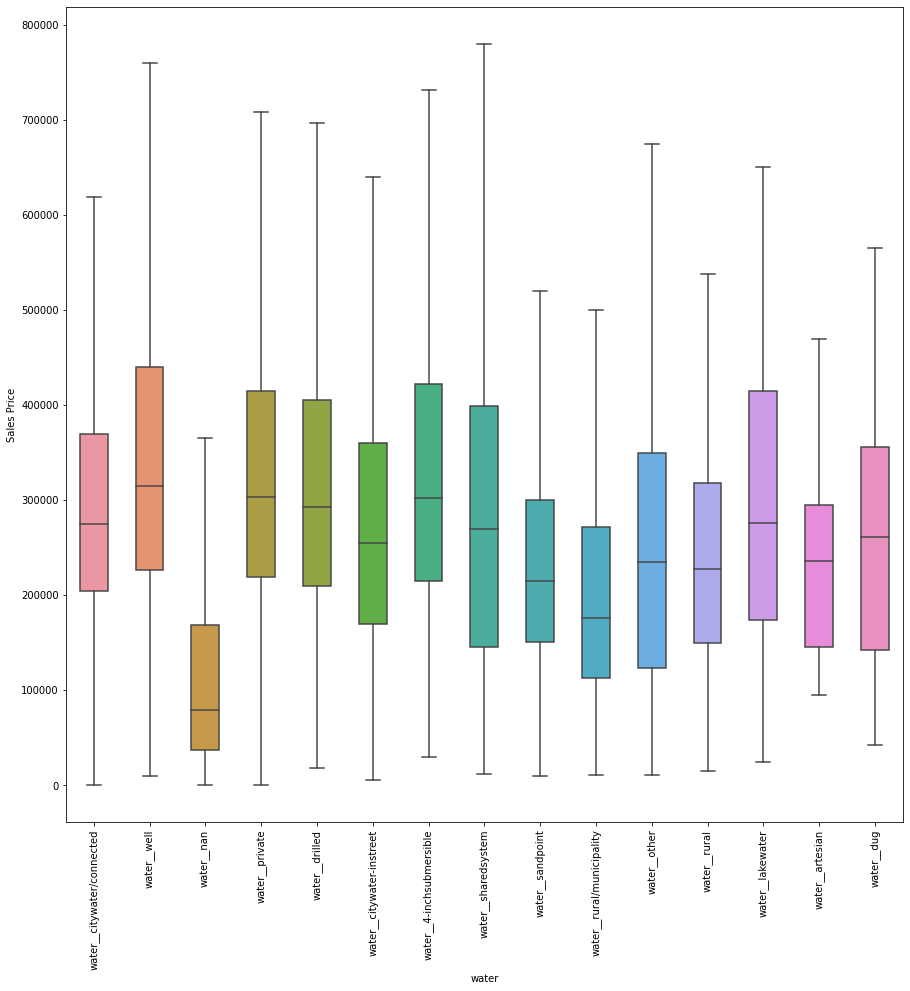

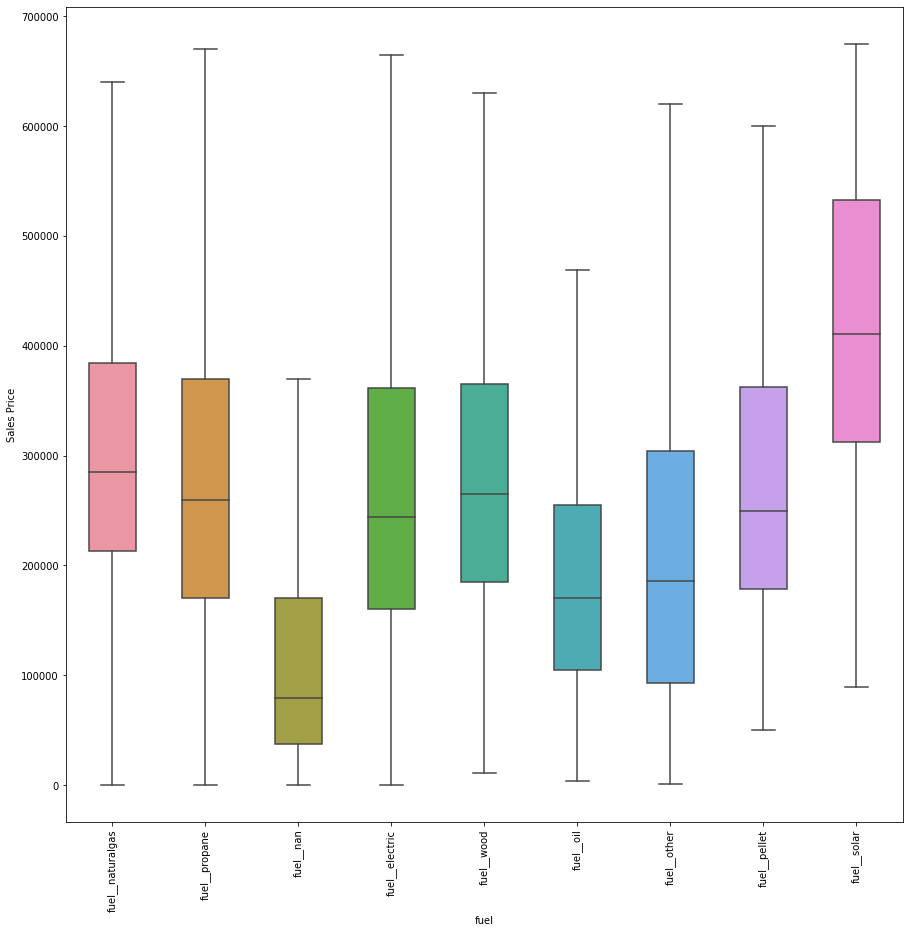

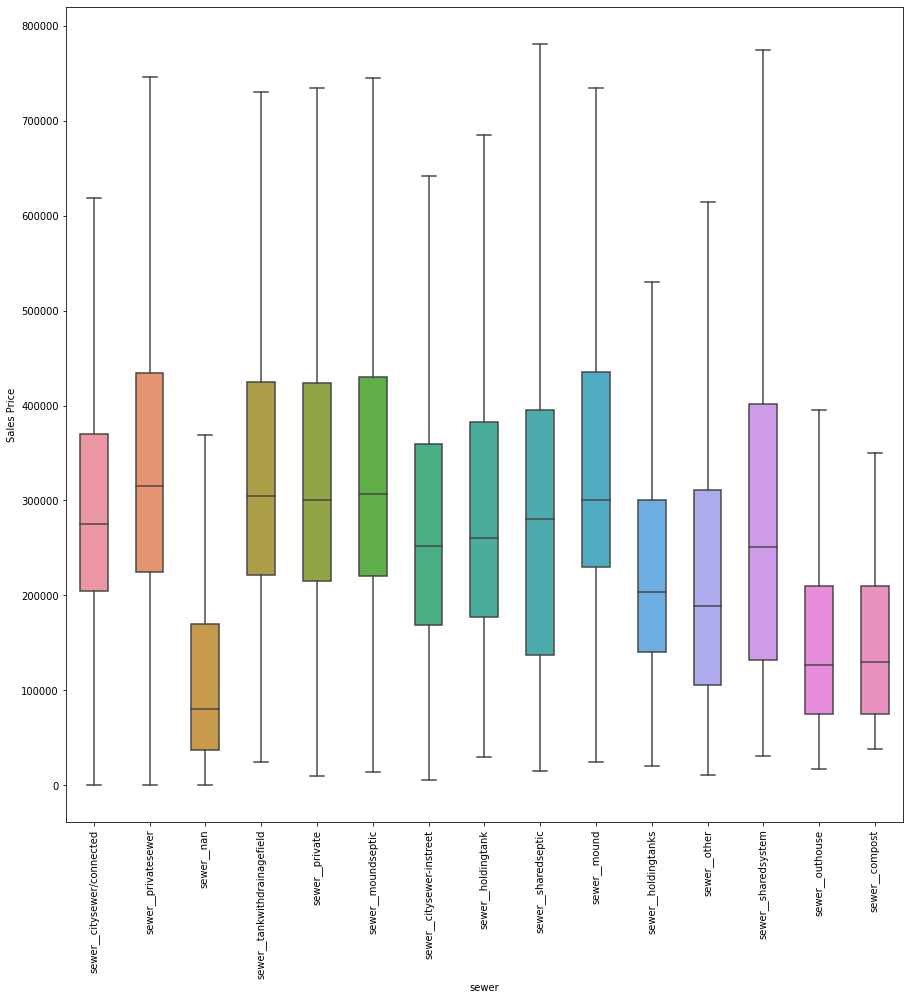

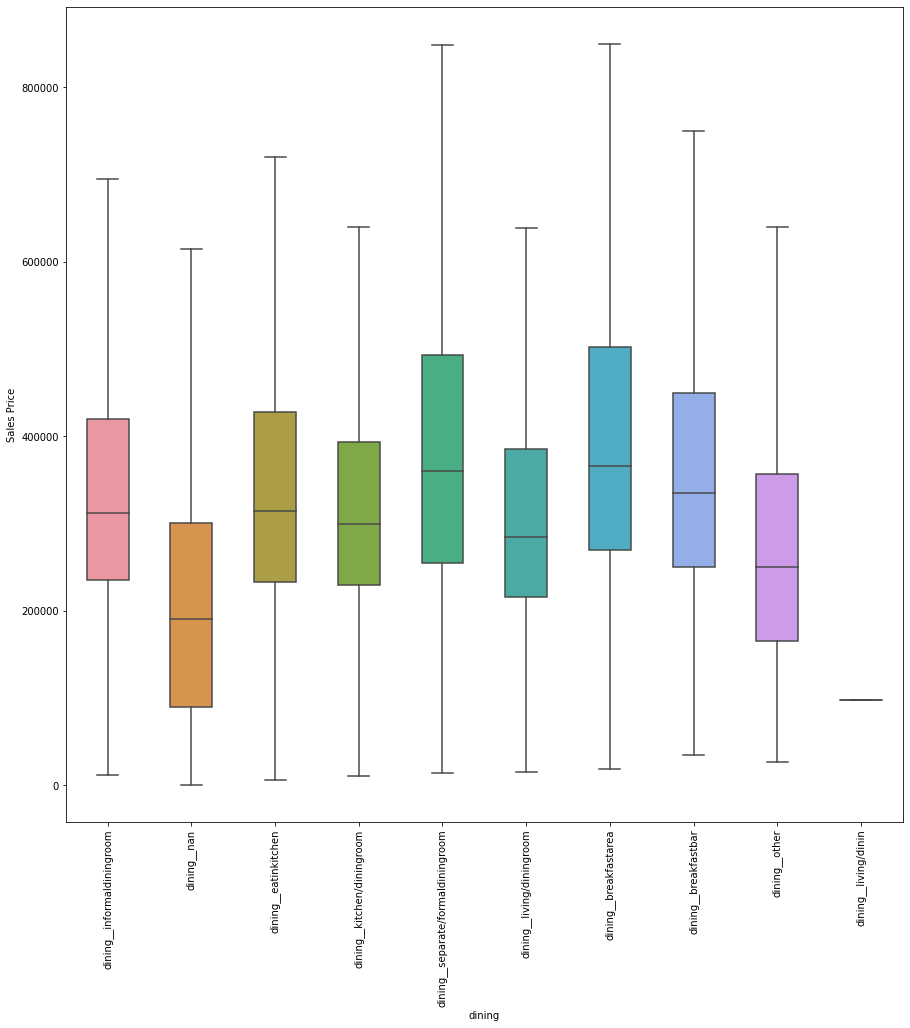

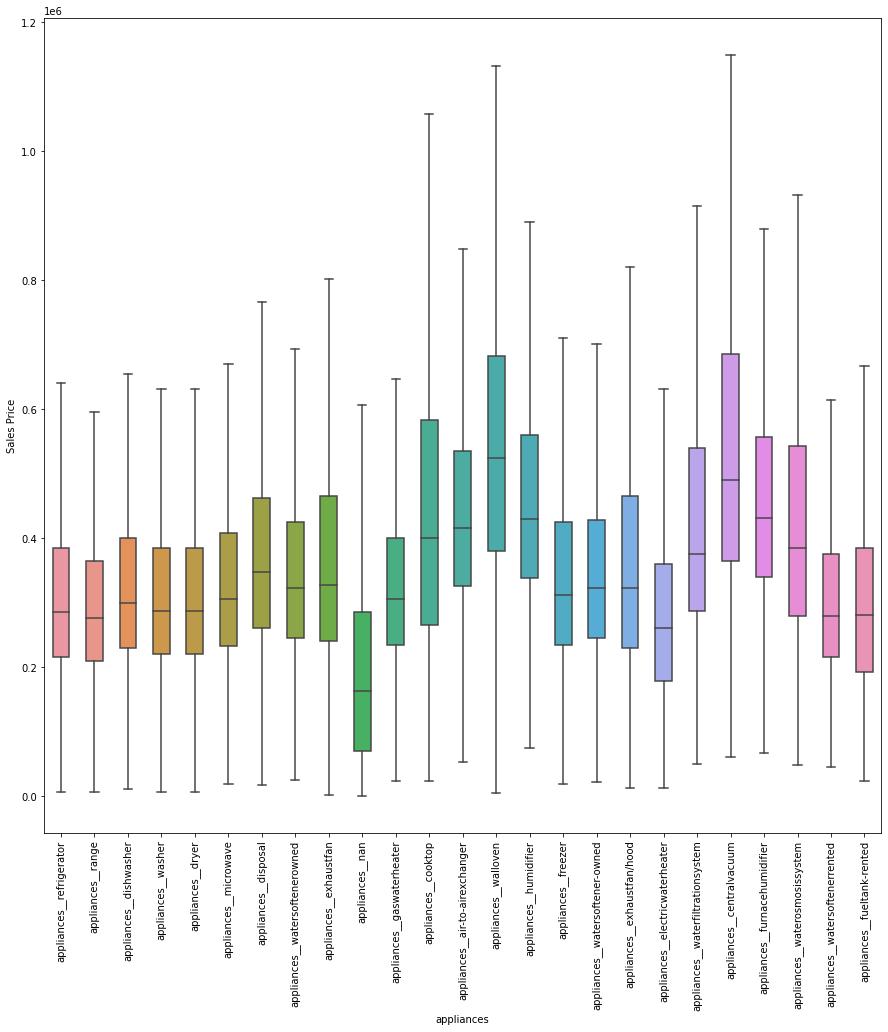

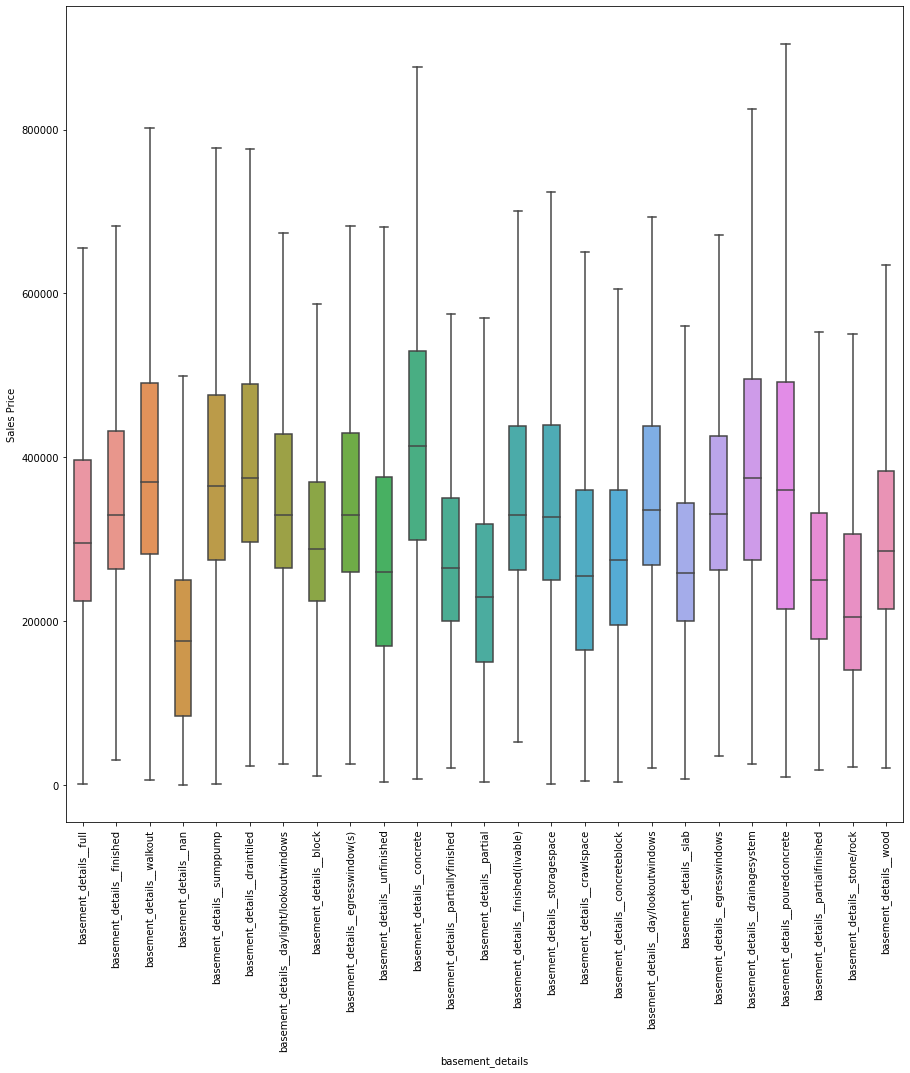

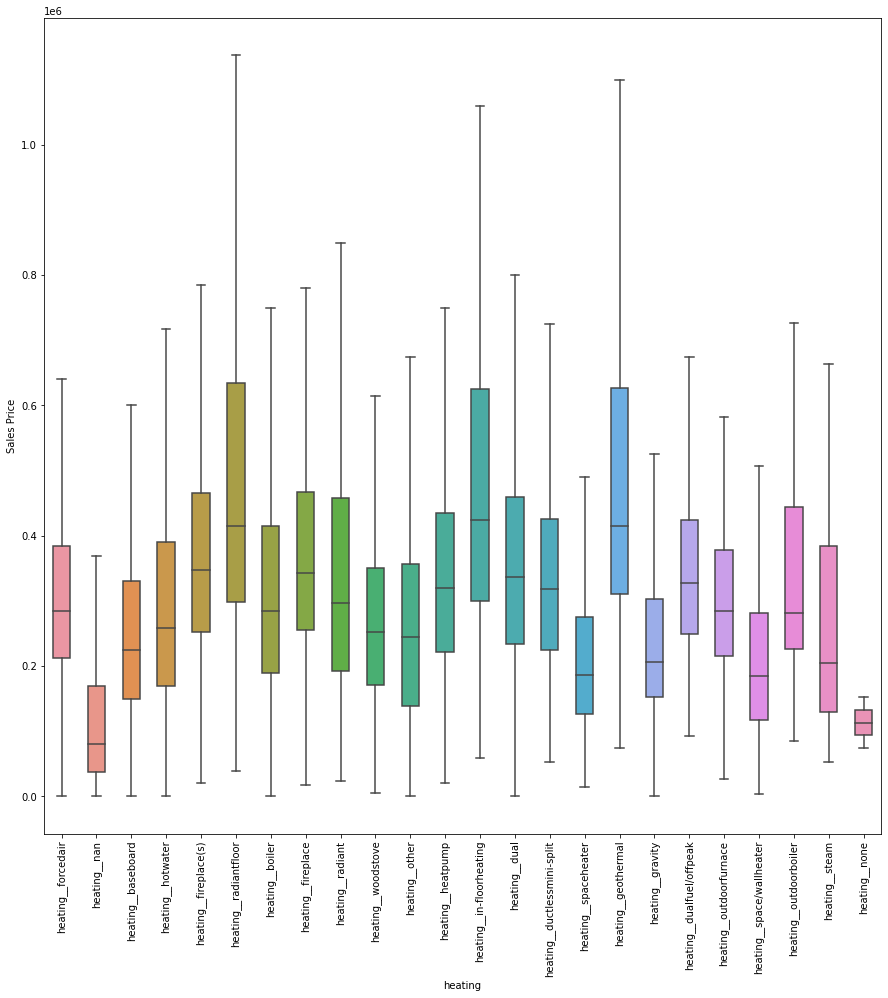

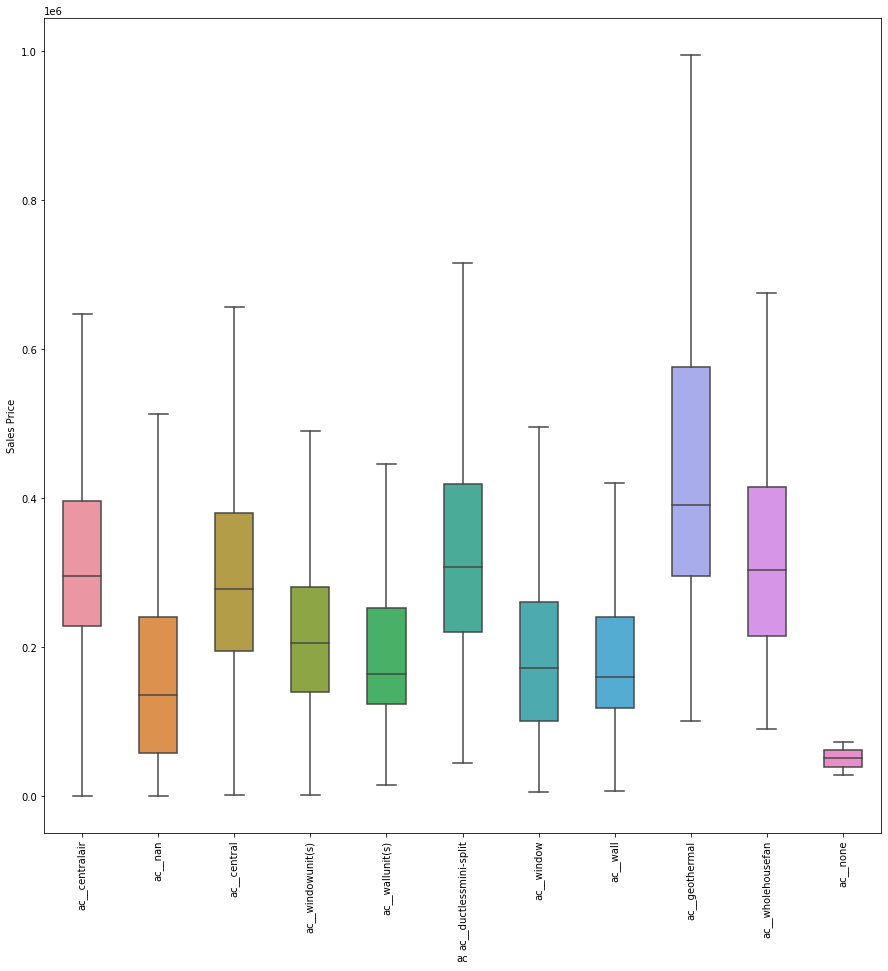

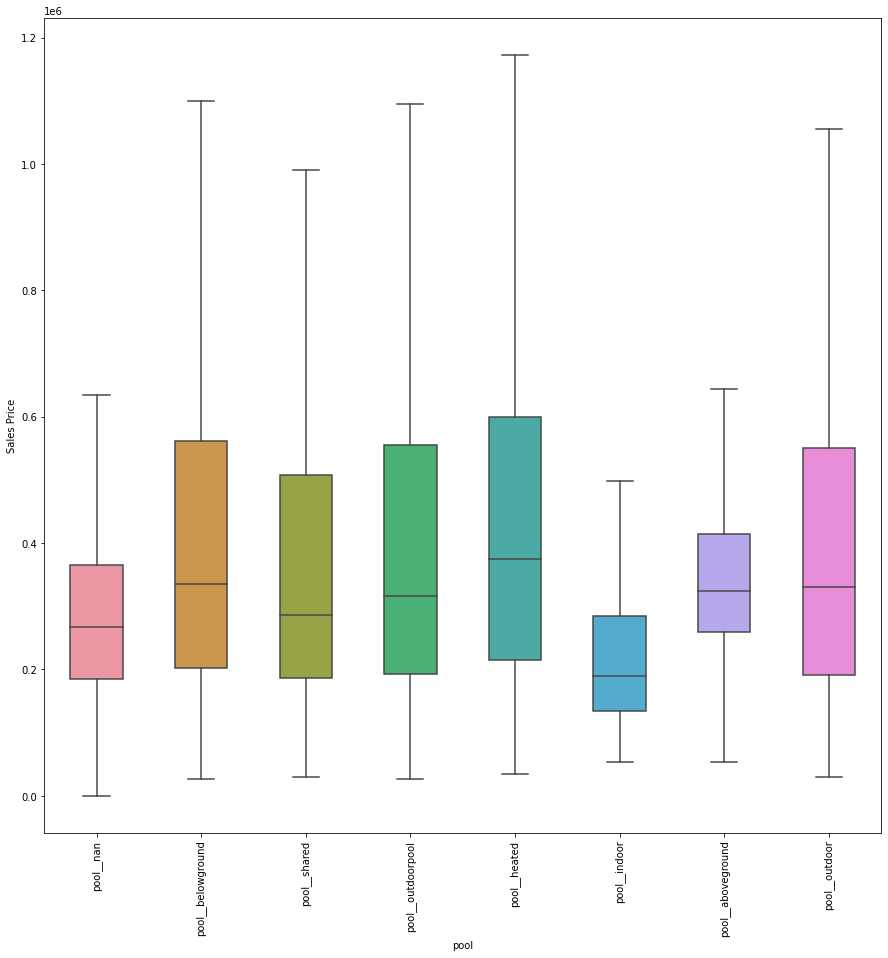

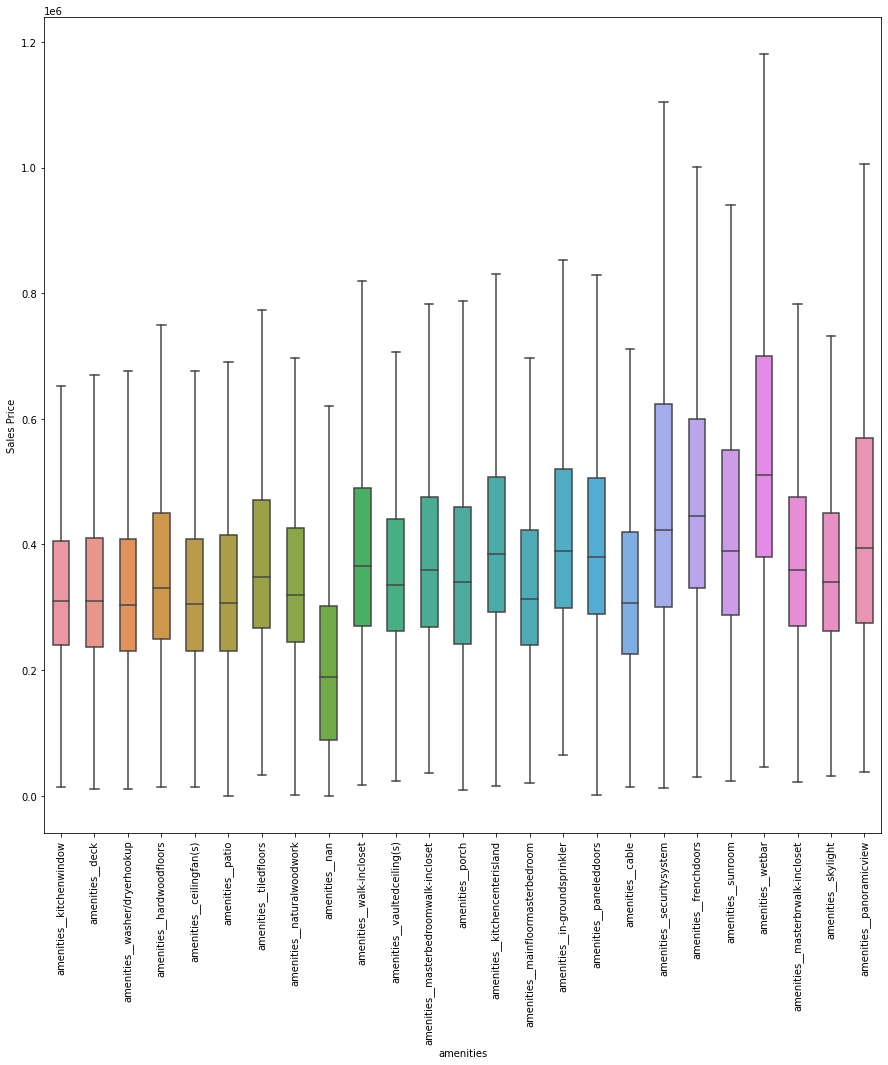

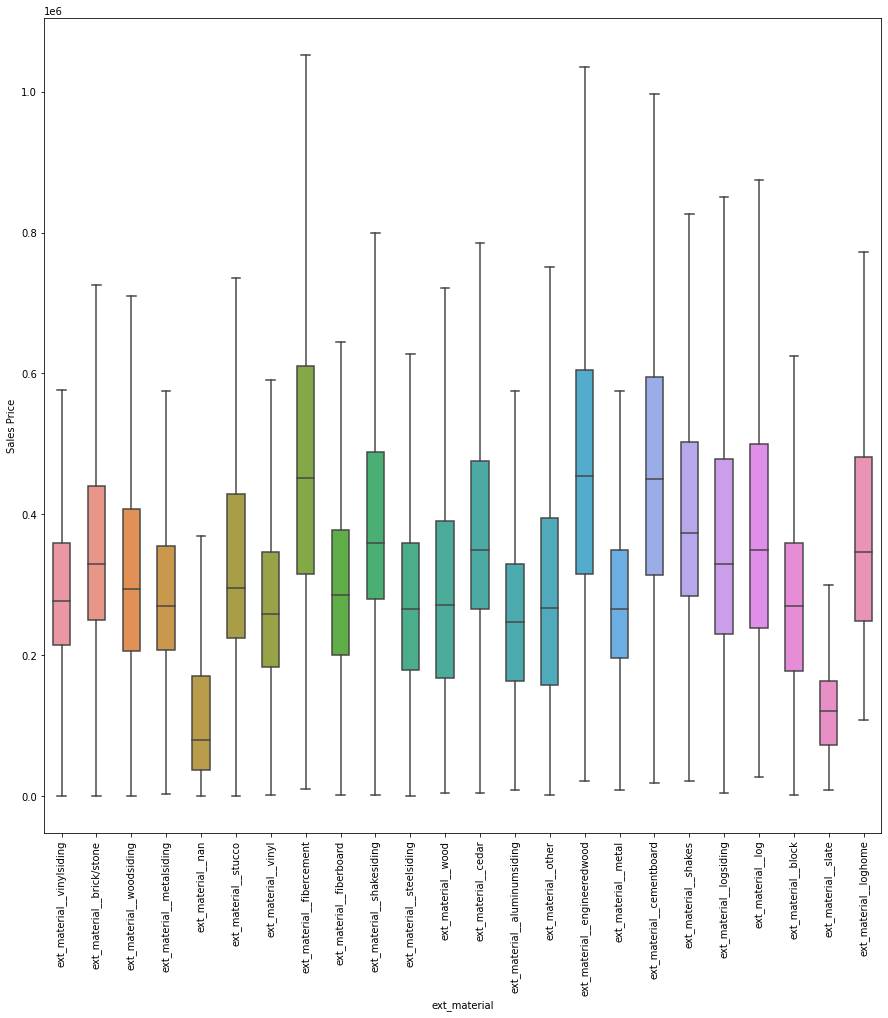

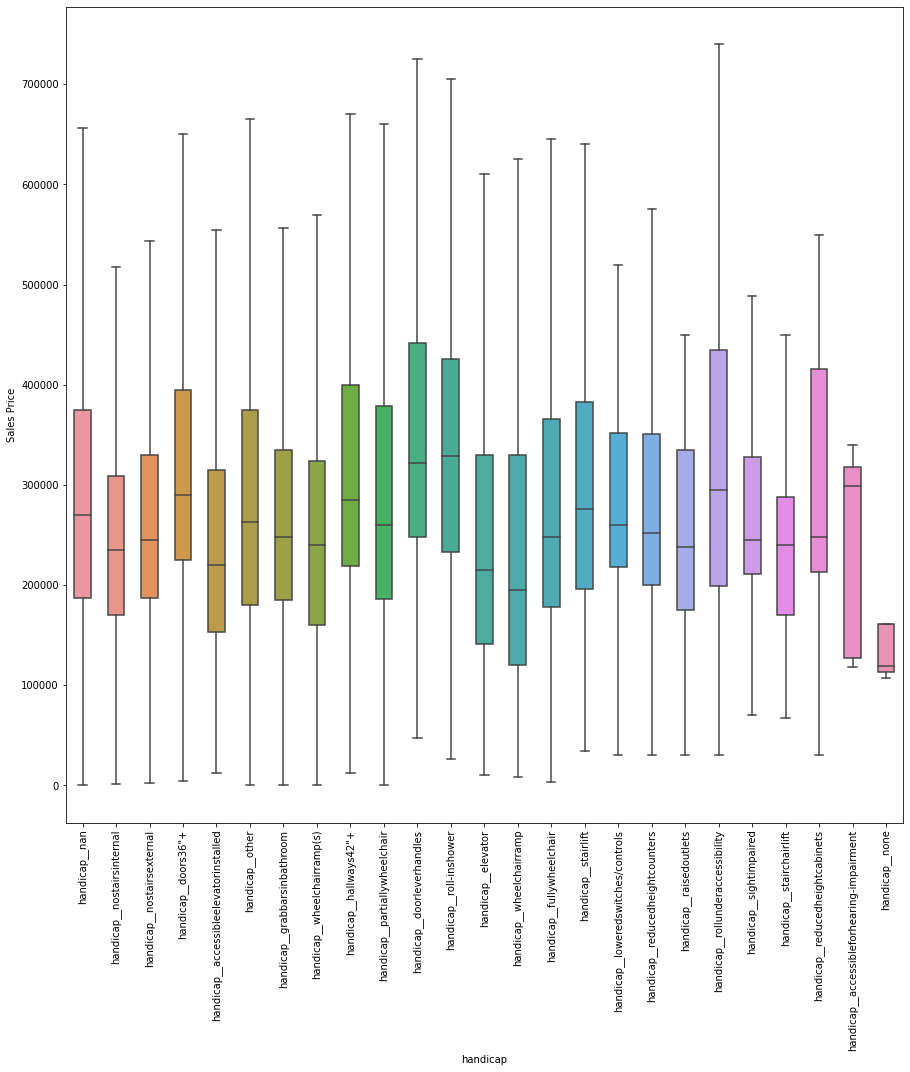

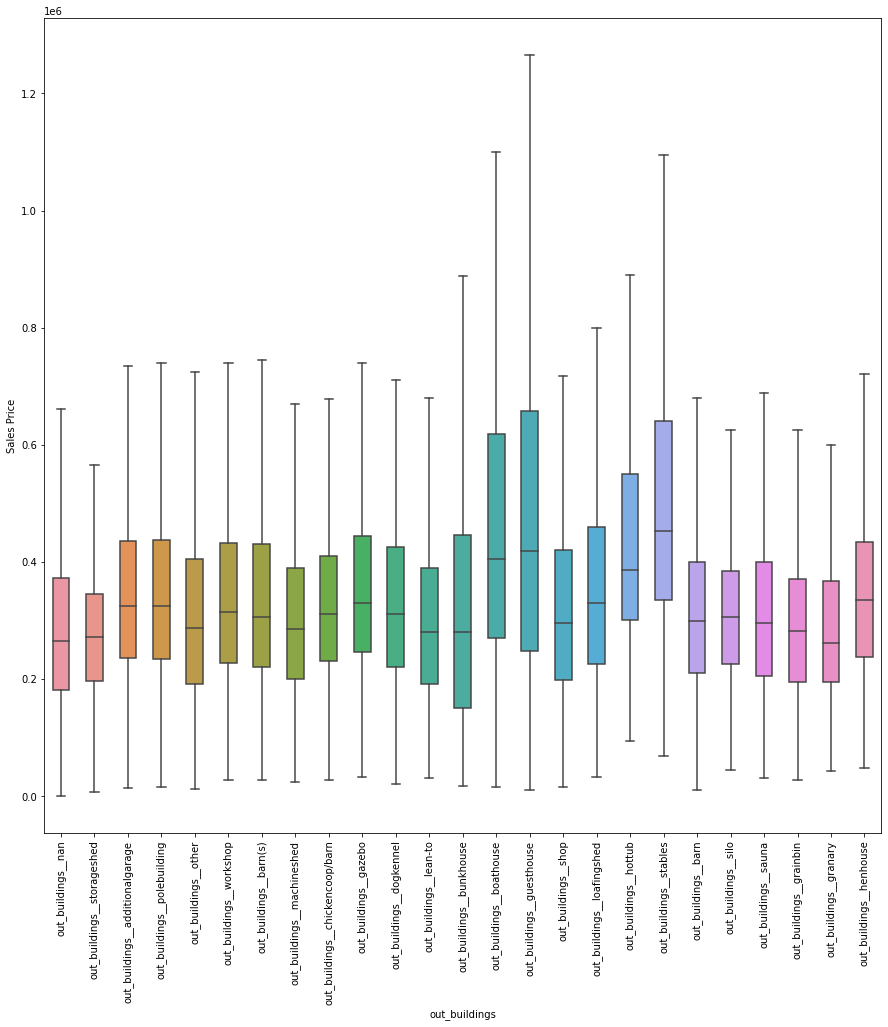

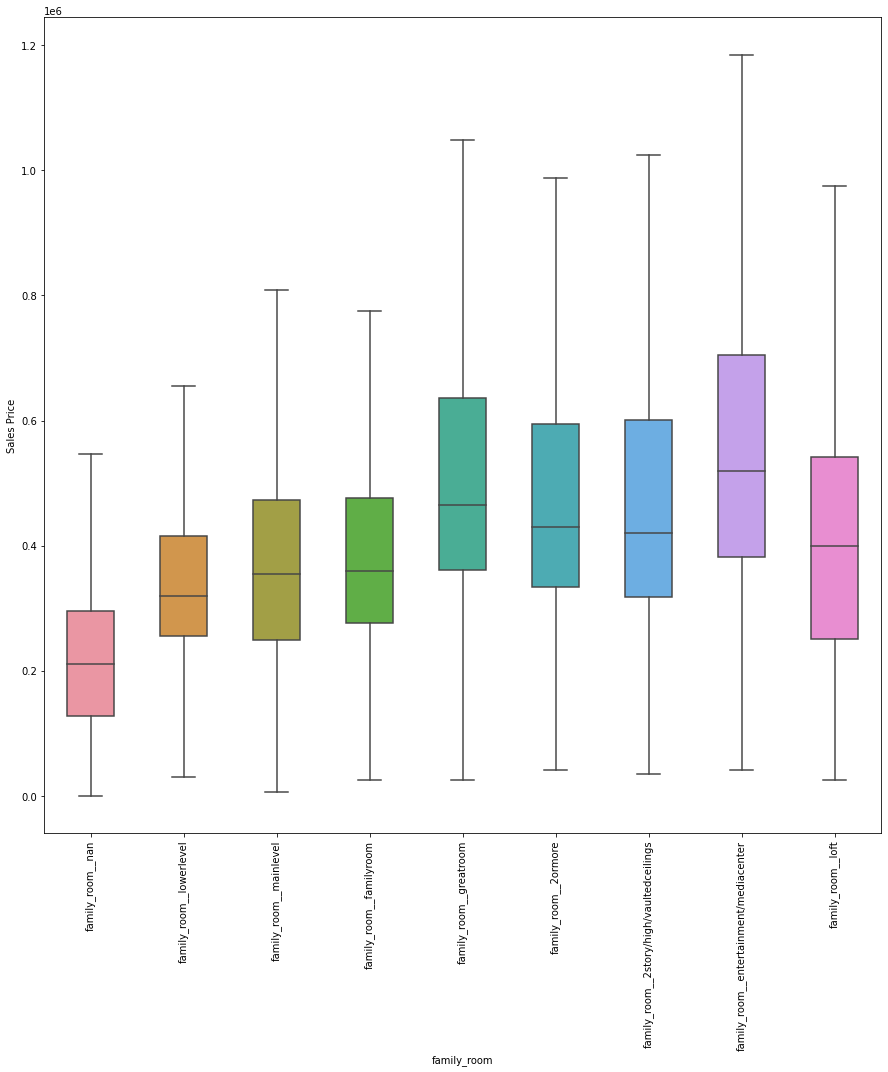

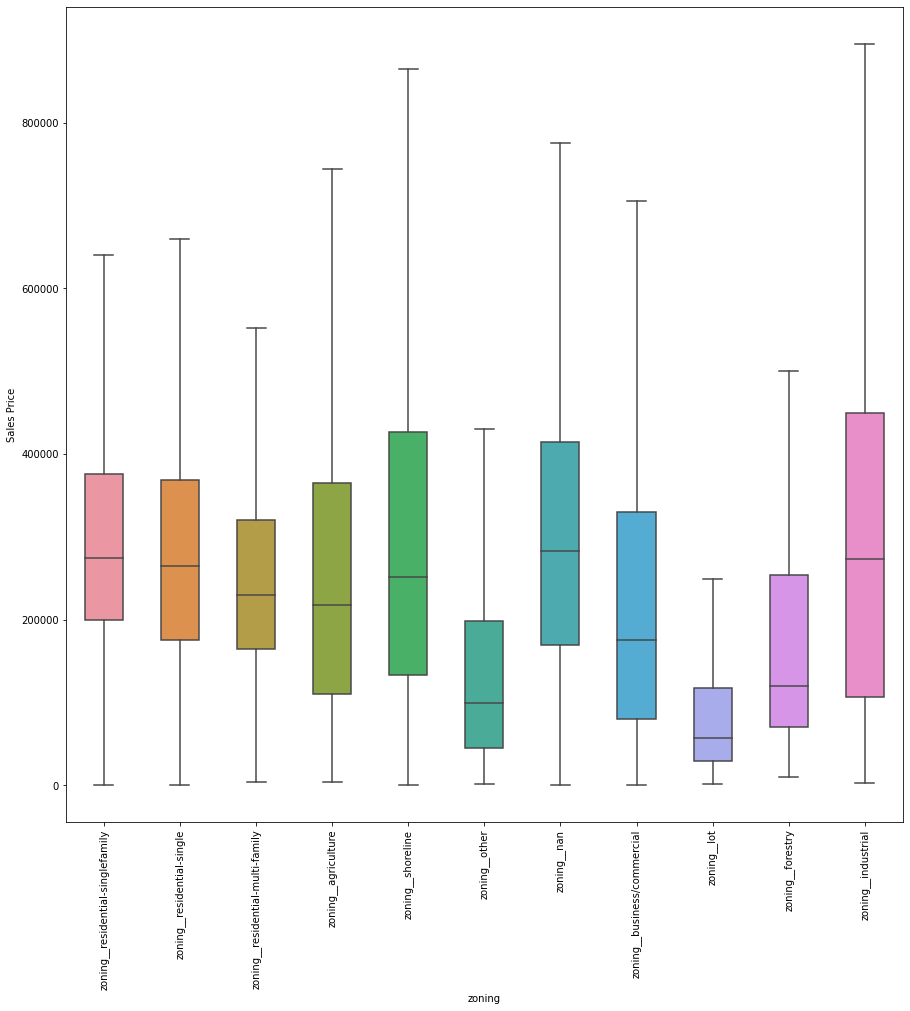

In [ ]:
for column in list_columns:
  one_hot_boxplot(
    df_properties.filter(like=f'{column}__'),
    df_properties['sell_price'],
    column,
    'Sales Price'
  )

From here, we can see how outliers in school districts and counties may have a significant effect on prices.

We can also see how property types have significantly different spreads in terms of sales price.

#### Numerical Columns

In [ ]:
continuous_columns = [
  'built',
  'list_price',
  'fin_sqft',
  'above_gd_sqft',
  'below_gd_sqft',
  'foundation_size',
  'lot',
  'lat',
  'lng',
  'association_fee',
  'annual_taxes',
]

time_columns = [
    'sell_date',              
]

discrete_columns = [
  'num_bath',
  'num_bed',                    
  'quarter_baths',
  'half_baths',
  'threequarter_baths',
  'full_baths',
  'num_fireplaces',
  'num_garage_spaces',
]

In [ ]:
import numpy as np

# Remove illogical values
df_properties['built'] = df_properties['built'].replace(0, np.nan)

In [ ]:
df_properties.columns

Index(['pid', 'sell_date', 'sell_price', 'list_price', 'built', 'num_bath',
       'num_bed', 'fin_sqft', 'above_gd_sqft', 'below_gd_sqft',
       ...
       'school_district__621.0', 'school_district__283.0',
       'school_district__272.0', 'property_type__singlefamily',
       'property_type__condo/townhome', 'property_type__lot/land',
       'property_type__multi-family', 'property_type__commercial',
       'property_type__farm', 'property_type__nan'],
      dtype='object', length=392)

There appears several trends with latitude, longitude, square footage, and listing price.

Some outputs are not as clear, suggesting further data cleaning may be required.


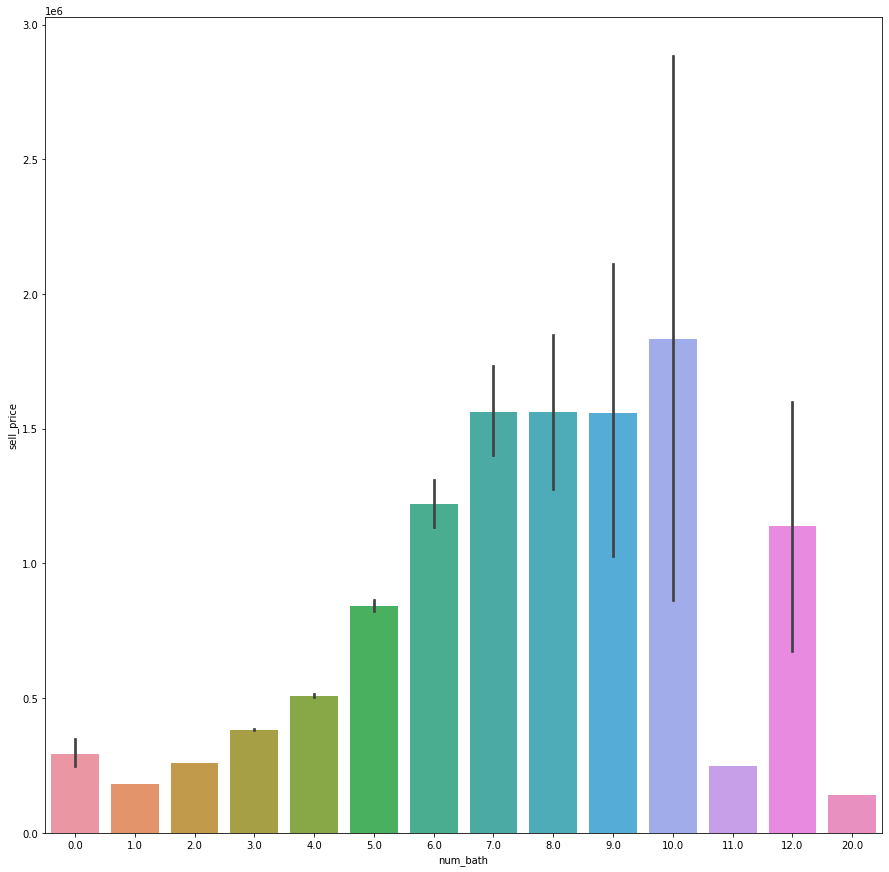

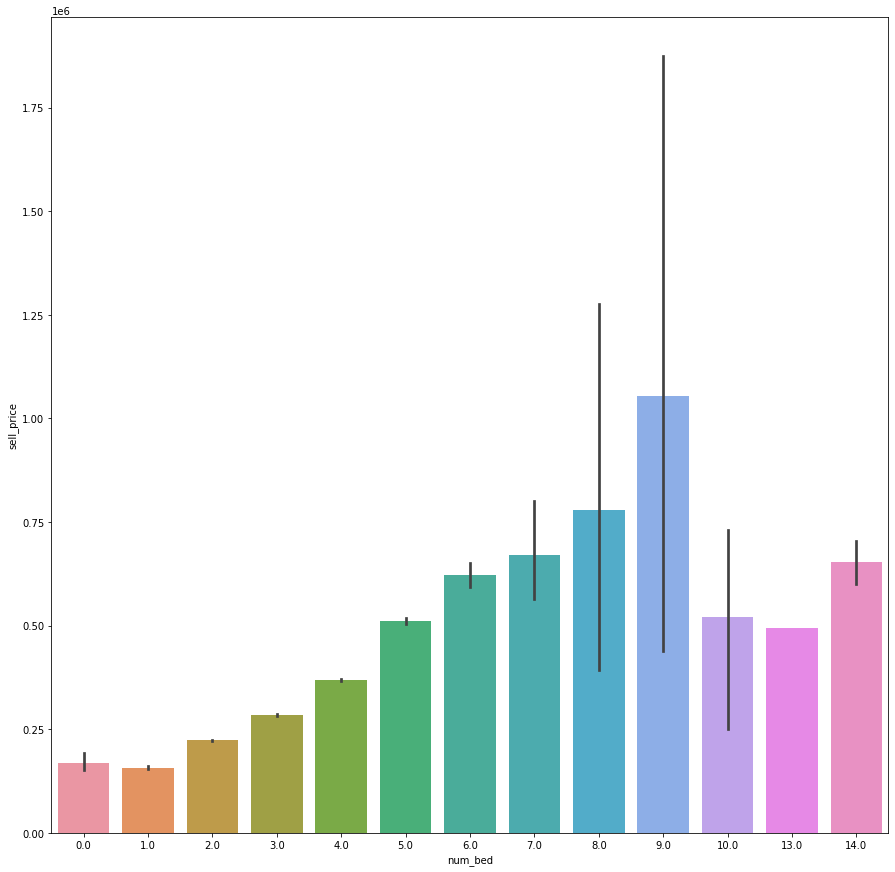

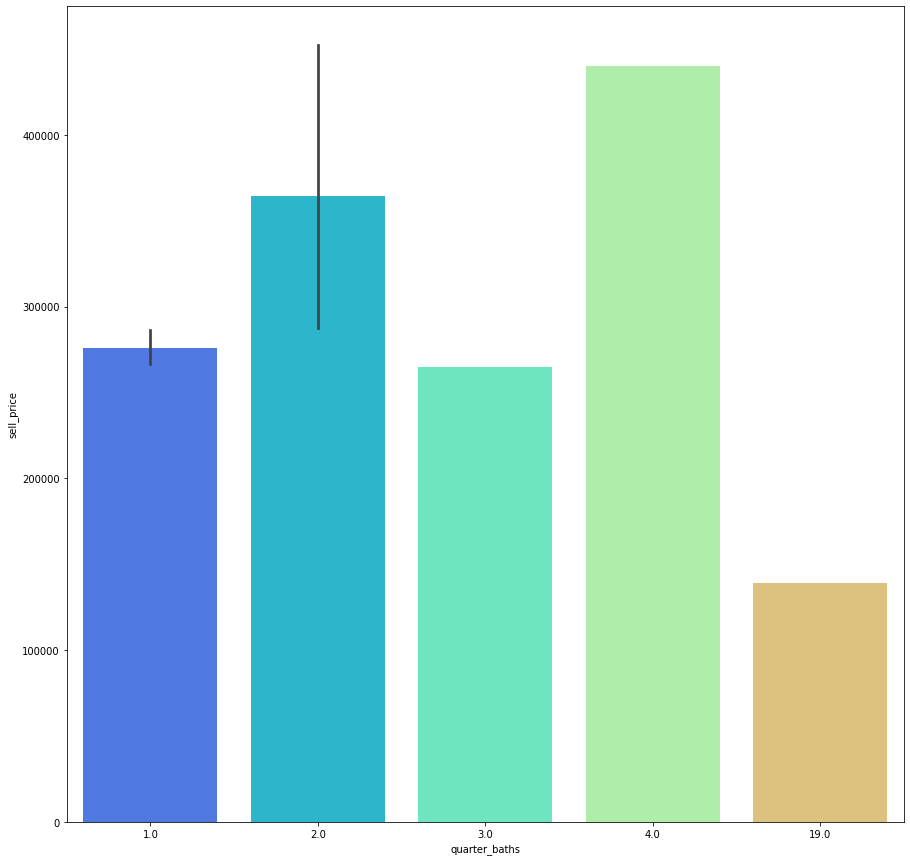

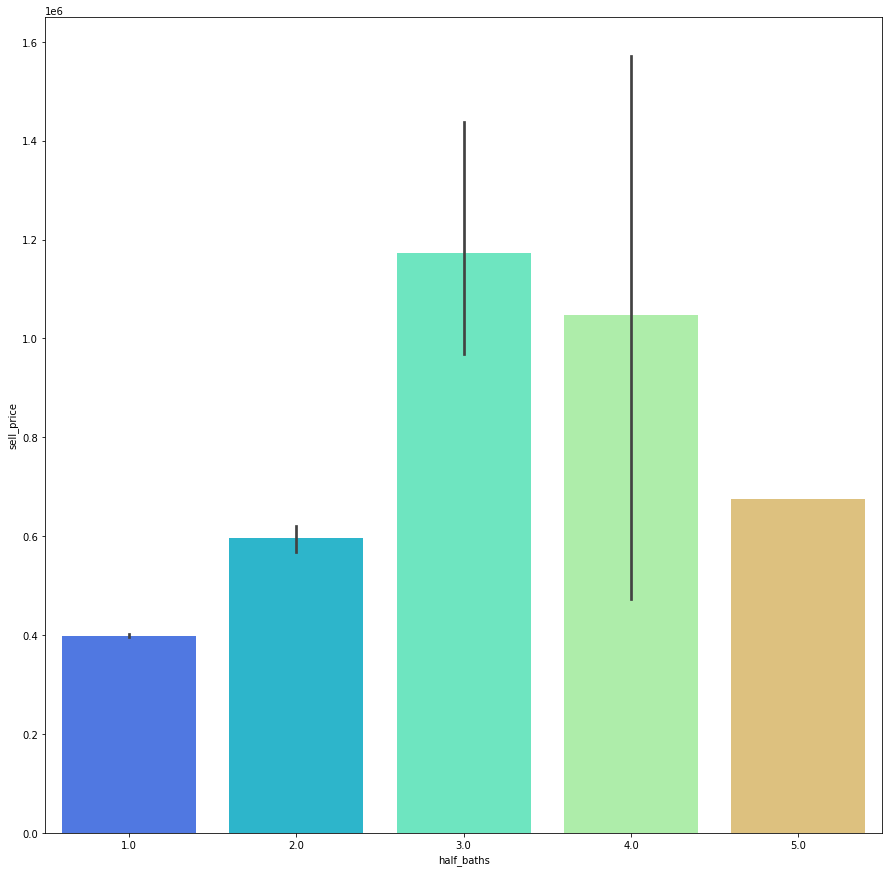

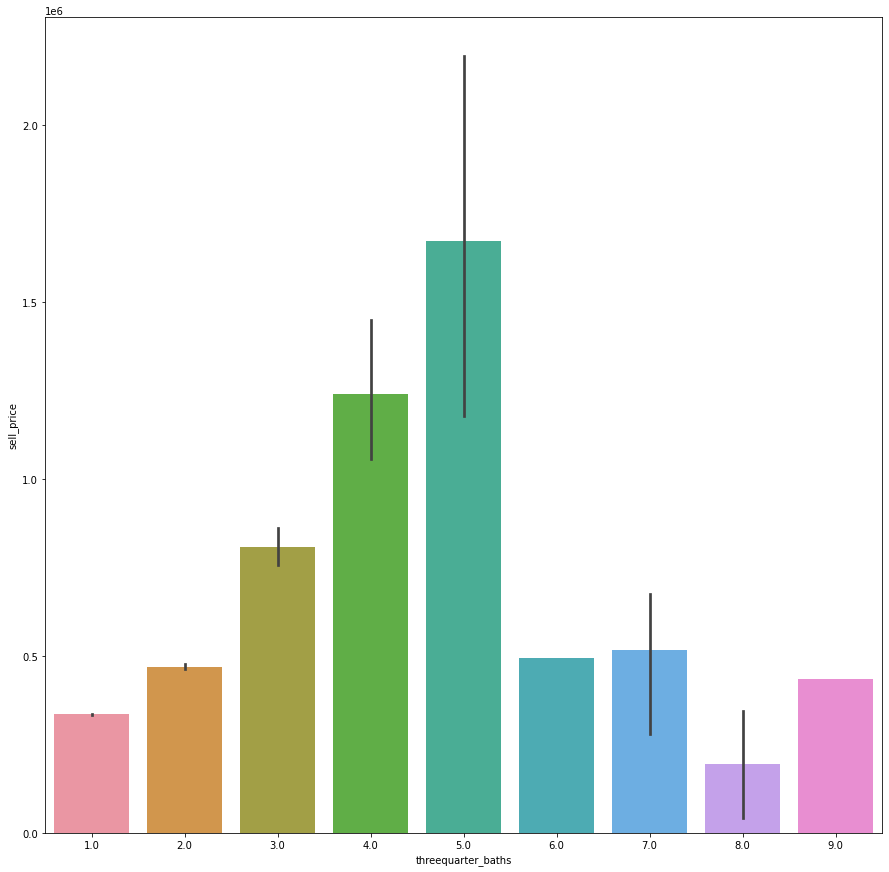

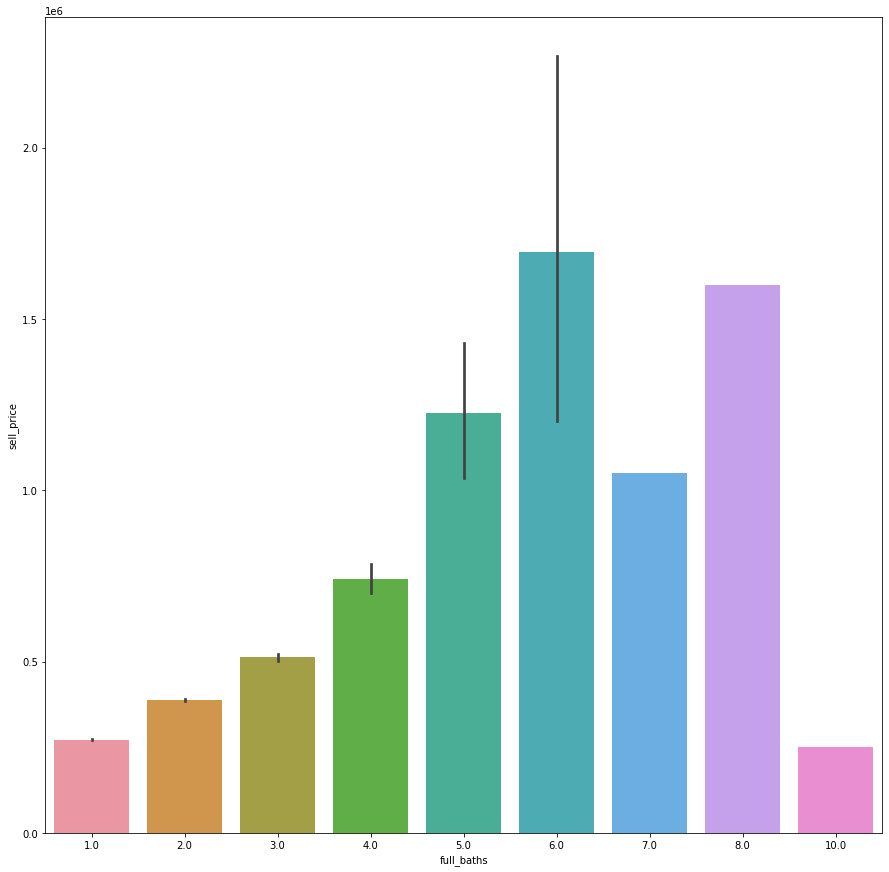

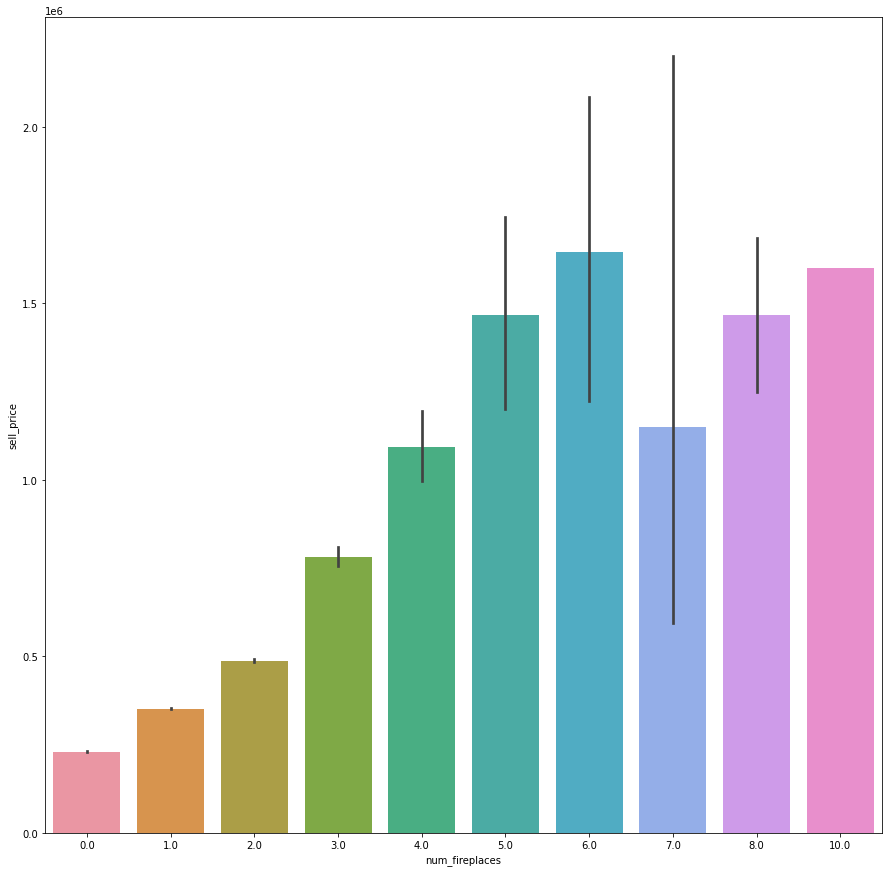

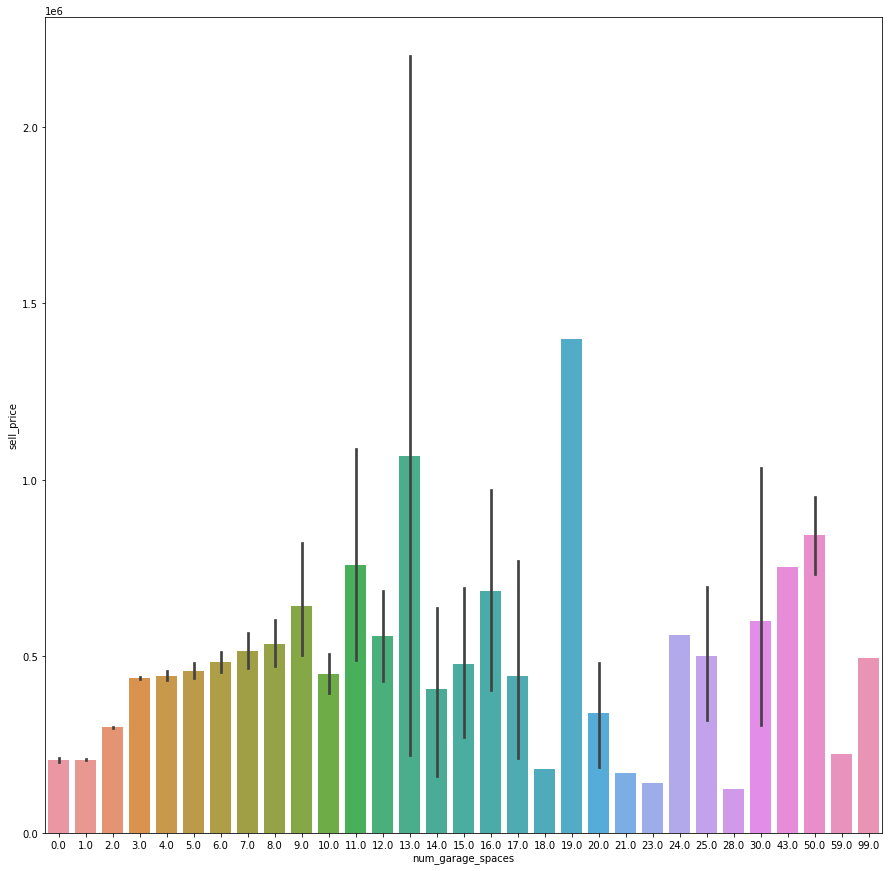

In [ ]:
for column in discrete_columns:
  sns.barplot(
      data=df_properties,
      x=column,
      y='sell_price'
  )
  plt.show()

There is a clear increase in sales price for several discrete factors, such as number of beds/baths/ fireplaces/garage spaces, but they each appear to tail off after a point.

#### Boolean Columns

In [ ]:
# Boolean columns
boolean_columns = [
  'common_wall',
]

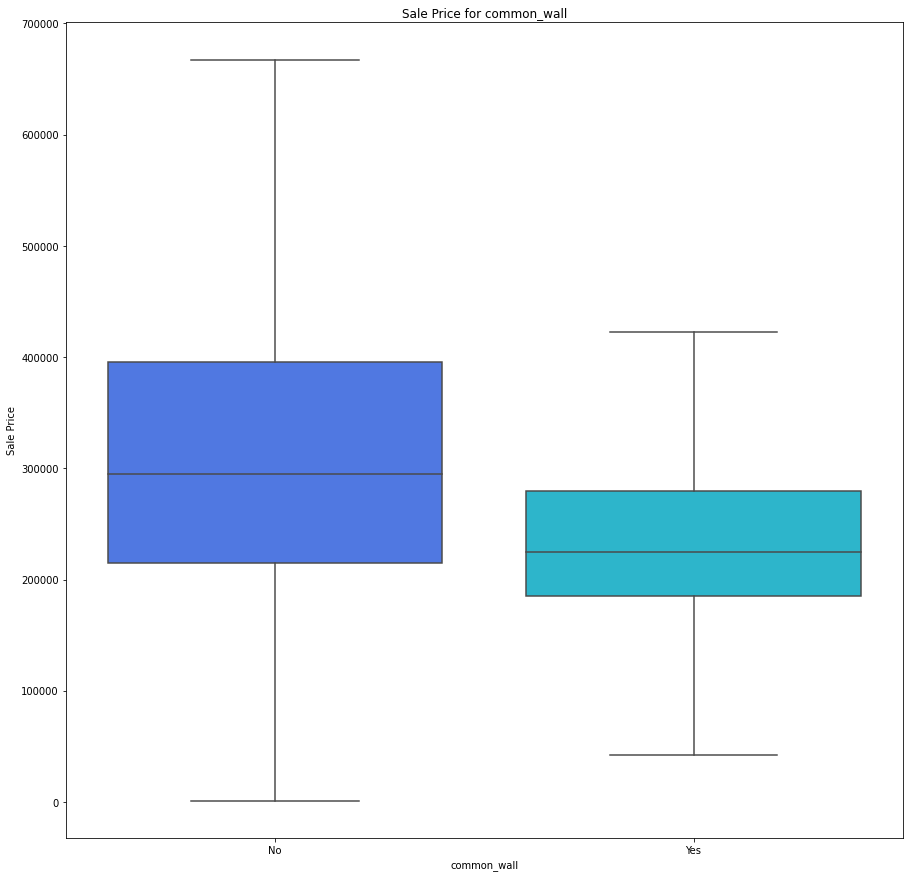

In [ ]:
for column in boolean_columns:
  sns.boxplot(data=df_properties, y='sell_price', x=column, showfliers=False)
  plt.title(f'Sale Price for {column}')
  plt.ylabel("Sale Price")
  plt.xlabel(column)
  plt.show()

Common walls appear to reduce the price of the home.

In [ ]:
for column in boolean_columns:
  df_properties[column] = df_properties[column].map({ 'No': 0, 'Yes': 1 }).fillna(0)

In [ ]:
sell_date = pd.to_datetime(df_properties['sell_date'])

df_properties['sell_day'] = sell_date.dt.day
df_properties['sell_month'] = sell_date.dt.month
df_properties['sell_year'] = sell_date.dt.year

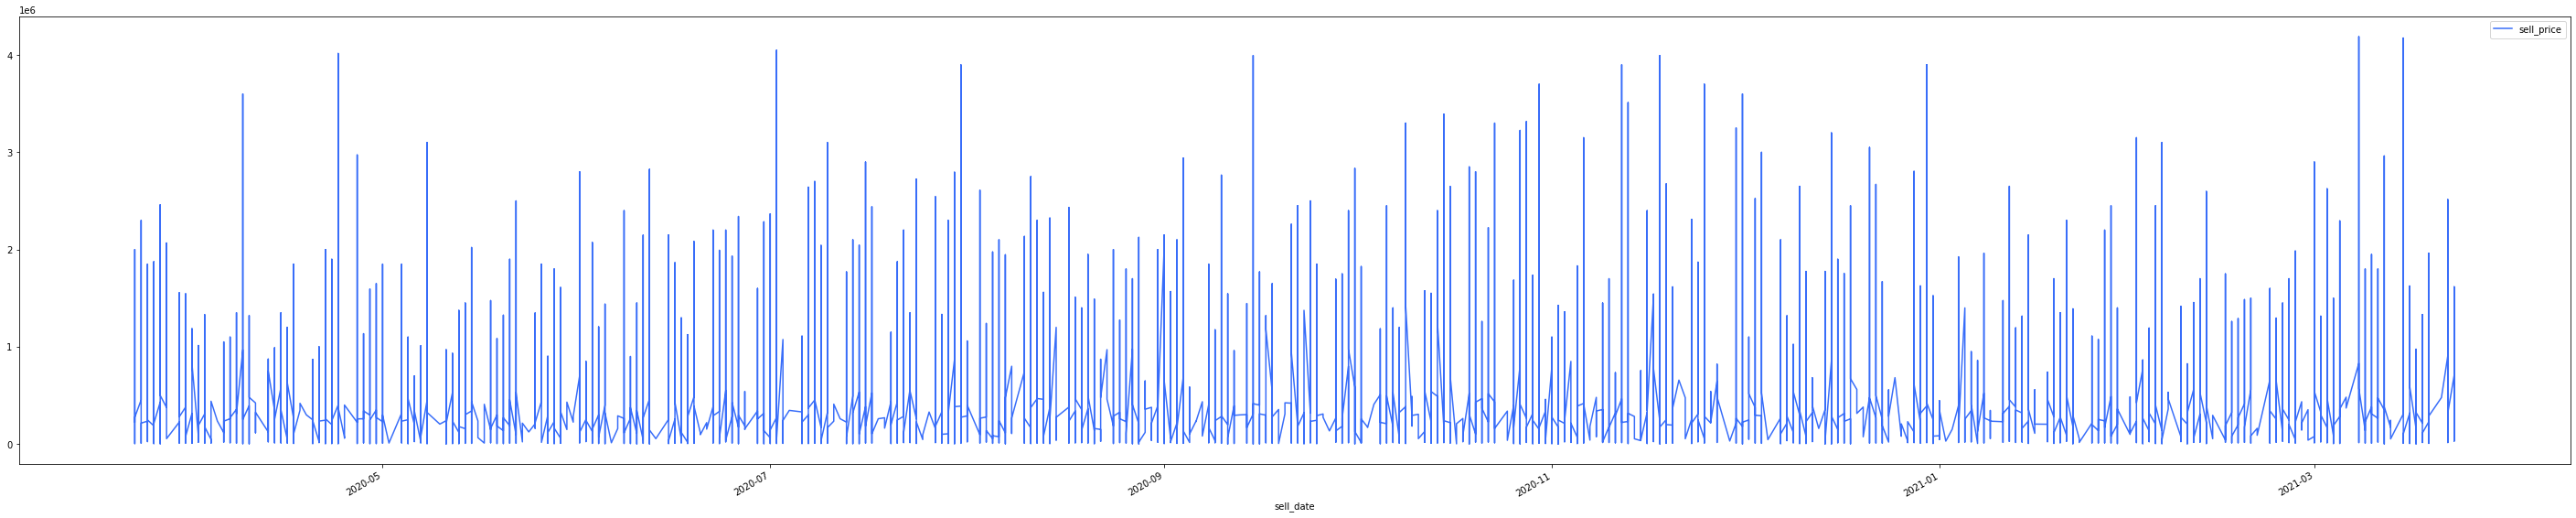

In [ ]:
_, ax = plt.subplots(figsize=(50, 10))

ts = df_properties[['sell_price']].join(sell_date)
ts.plot(x='sell_date', y='sell_price', ax=ax)

In [ ]:
df_properties.drop('sell_date', 1, inplace=True)

There is no discernible change in sales price with respect to time across this period.

### Analysis

In [ ]:
df_properties

pid  sell_price  list_price  ...  sell_day  sell_month  sell_year
0       5648469   4189000.0   4250000.0  ...       8.0         3.0     2021.0
1       5543377   4175000.0   4500000.0  ...      15.0         3.0     2021.0
2       5564746   4050000.0   3995000.0  ...       2.0         7.0     2020.0
3       5475977   4016162.0         1.0  ...      24.0         4.0     2020.0
4       5620644   3995000.0   3995000.0  ...      15.0         9.0     2020.0
...         ...         ...         ...  ...       ...         ...        ...
102951  5677597       650.0       725.0  ...       1.0        12.0     2020.0
102952  5571254       625.0       625.0  ...      14.0        12.0     2020.0
102953  5499991        14.0        19.0  ...      11.0         9.0     2020.0
102954  5582190         4.0         3.0  ...      15.0         9.0     2020.0
102955  5681737         1.0       925.0  ...       2.0        11.0     2020.0

[102956 rows x 394 columns]

In [ ]:
%%script false
f, ax = plt.subplots(1, 1, figsize=(300, 300))
sns.heatmap(df_properties.corr(), ax=ax)

In [ ]:
df_properties.corr()['sell_price'].sort_values(ascending=False)[0:25]

sell_price                               1.000000
list_price                               0.989223
fin_sqft                                 0.700515
above_gd_sqft                            0.667185
num_bath                                 0.617493
num_fireplaces                           0.519966
below_gd_sqft                            0.452459
num_bed                                  0.420522
appliances__walloven                     0.382657
full_baths                               0.367186
amenities__kitchencenterisland           0.327577
num_garage_spaces                        0.321133
amenities__tiledfloors                   0.317577
amenities__walk-incloset                 0.310522
threequarter_baths                       0.306653
appliances__air-to-airexchanger          0.298022
amenities__in-groundsprinkler            0.297363
amenities__hardwoodfloors                0.297135
amenities__wetbar                        0.296197
basement_details__walkout                0.295011


## Models

In [ ]:
# Remove columns
df_properties.drop(columns=['pid'], inplace=True)

### Imputing Data

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_properties = pd.DataFrame(
    imputer.fit_transform(df_properties),
    index=df_properties.index,
    columns=df_properties.columns
)

In [ ]:
df_properties.describe()

sell_price    list_price  ...     sell_month      sell_year
count  1.029560e+05  1.029560e+05  ...  102956.000000  102956.000000
mean   3.035790e+05  3.047710e+05  ...       7.063108    2020.143625
std    2.166886e+05  2.223840e+05  ...       3.169698       0.350485
min    1.000000e+00  1.000000e+00  ...       1.000000    2020.000000
25%    1.850000e+05  1.869000e+05  ...       5.000000    2020.000000
50%    2.693325e+05  2.690000e+05  ...       7.000000    2020.000000
75%    3.700000e+05  3.699000e+05  ...      10.000000    2020.000000
max    4.189000e+06  6.200000e+06  ...      12.000000    2021.000000

[8 rows x 393 columns]

In [ ]:
max(df_properties.isna().sum())

0

### Scaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_properties_scaled = pd.DataFrame(
    scaler.fit_transform(df_properties.drop(columns=['sell_price'])),
    index=df_properties.index,
    columns=df_properties.drop(columns=['sell_price']).columns
)

In [ ]:
df_properties_scaled.describe()

list_price          built  ...     sell_month      sell_year
count  102956.000000  102956.000000  ...  102956.000000  102956.000000
mean        0.049156       0.855550  ...       0.551192       0.143625
std         0.035868       0.103767  ...       0.288154       0.350485
min         0.000000       0.000000  ...       0.000000       0.000000
25%         0.030145       0.797508  ...       0.363636       0.000000
50%         0.043387       0.866044  ...       0.545455       0.000000
75%         0.059661       0.937695  ...       0.818182       0.000000
max         1.000000       1.000000  ...       1.000000       1.000000

[8 rows x 392 columns]

In [ ]:
from sklearn.model_selection import train_test_split

# X = df_properties_scaled.drop(columns=['sell_price'])
X = df_properties_scaled.drop(columns=['list_price'])

# Using 'log' of price for better predictions
y = np.log(df_properties['sell_price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Feature Selection

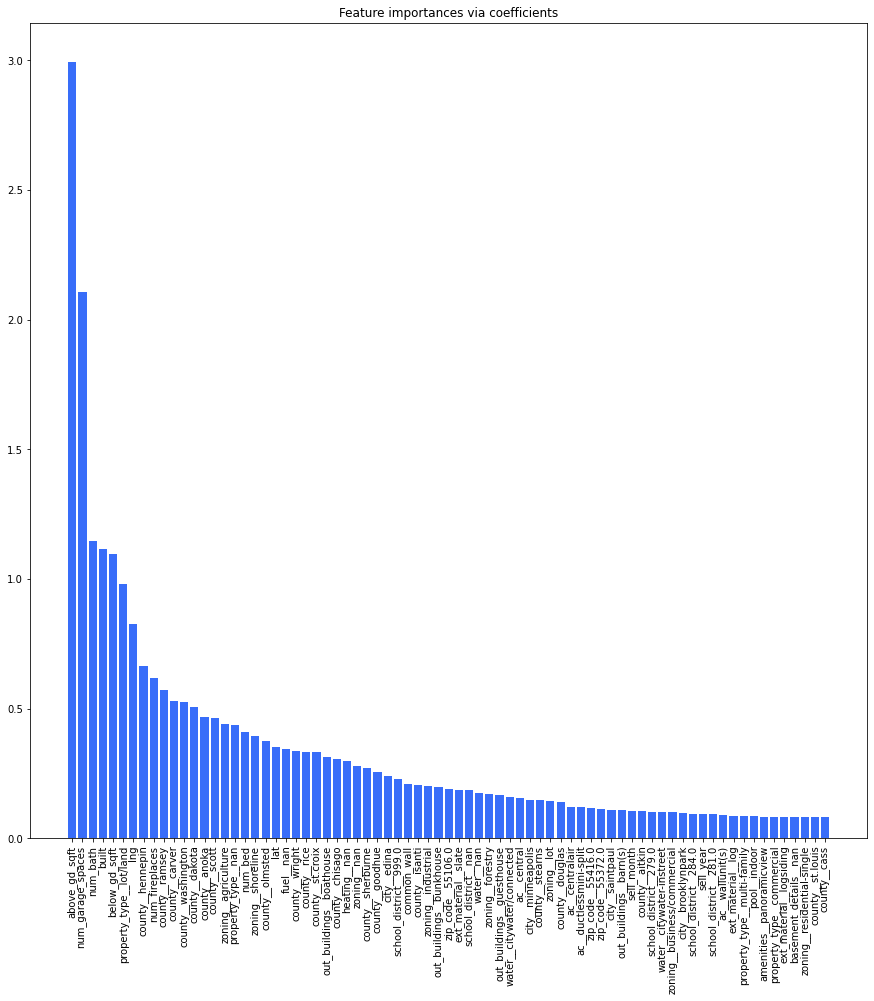

In [ ]:
# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html

import numpy as np
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(X_train, y_train)

MAX_SHOWN_FEATURES = 75
importance = np.abs(lasso.coef_)
feature_names = np.array(X.columns)

importance_df = pd.DataFrame(
    data={ 'importance': importance, 'feature_name': feature_names }
).sort_values("importance", ascending=False).iloc[0:MAX_SHOWN_FEATURES,]

plt.bar(height=importance_df['importance'], x=importance_df['feature_name'])
plt.title("Feature importances via coefficients")
plt.xticks(rotation=90)
plt.show()

In [ ]:
importance_df

importance                feature_name
4      2.994495               above_gd_sqft
8      2.106420           num_garage_spaces
1      1.147566                    num_bath
0      1.115936                       built
5      1.097786               below_gd_sqft
..          ...                         ...
206    0.082556     ext_material__logsiding
97     0.081992       basement_details__nan
271    0.081920  zoning__residential-single
352    0.081246            county__st.louis
344    0.081175                county__cass

[75 rows x 2 columns]

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# Select from the model
clf = LassoCV(cv=5)

sfm = SelectFromModel(clf, threshold=0.05)
sfm.fit(X_train, y_train)
n_features = sfm.transform(X_train).shape[1]
print(n_features)

98


In [ ]:
chosen_features_lasso = list(X.columns[sfm.get_support()].values)
print('Chosen features: (%d)\n\t%s' % (len(chosen_features_lasso), "\n\t".join(chosen_features_lasso)))

Chosen features: (98)
	built
	num_bath
	num_bed
	above_gd_sqft
	below_gd_sqft
	num_fireplaces
	common_wall
	num_garage_spaces
	lat
	lng
	water__citywater/connected
	water__nan
	water__citywater-instreet
	fuel__naturalgas
	fuel__nan
	fuel__oil
	sewer__holdingtank
	sewer__sharedseptic
	appliances__dishwasher
	appliances__microwave
	basement_details__nan
	heating__forcedair
	heating__nan
	heating__radiantfloor
	heating__geothermal
	ac__centralair
	ac__nan
	ac__central
	ac__wallunit(s)
	ac__ductlessmini-split
	pool__indoor
	amenities__panoramicview
	ext_material__aluminumsiding
	ext_material__engineeredwood
	ext_material__cementboard
	ext_material__logsiding
	ext_material__log
	ext_material__slate
	handicap__wheelchairramp(s)
	handicap__doorleverhandles
	out_buildings__barn(s)
	out_buildings__machineshed
	out_buildings__bunkhouse
	out_buildings__boathouse
	out_buildings__guesthouse
	zoning__residential-single
	zoning__agriculture
	zoning__shoreline
	zoning__nan
	zoning__business/commercial

In [ ]:
import warnings
warnings.filterwarnings('ignore')

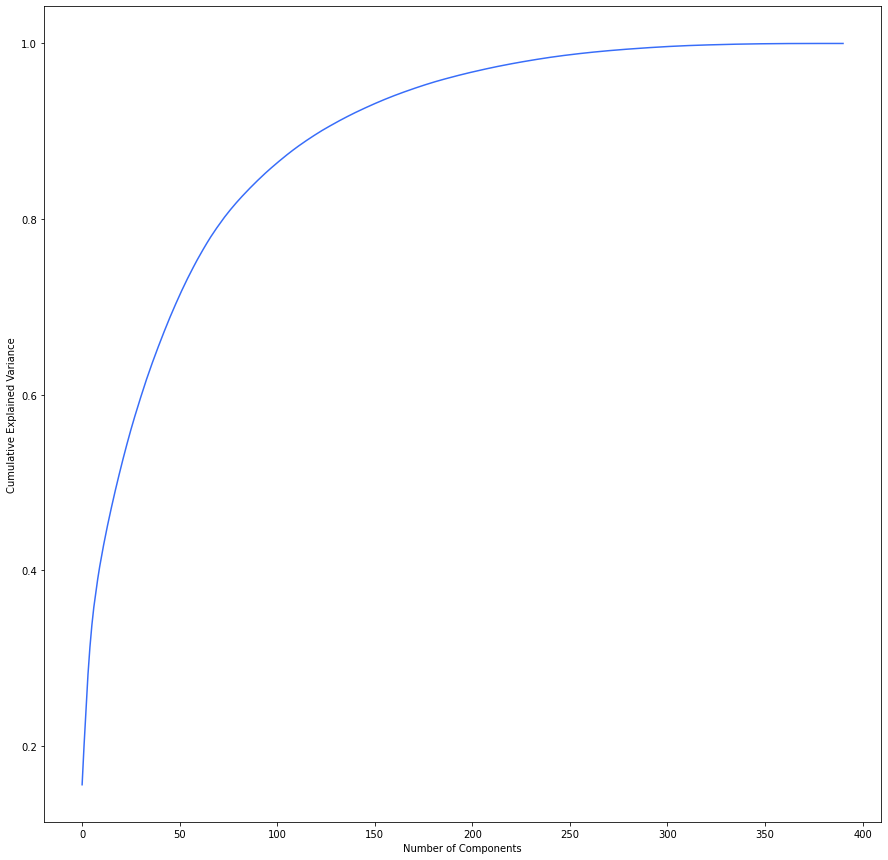

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
pca = PCA(0.85).fit(X_train)
pca.n_components_

94

### Clustering

[2 0 1 ... 0 1 2]


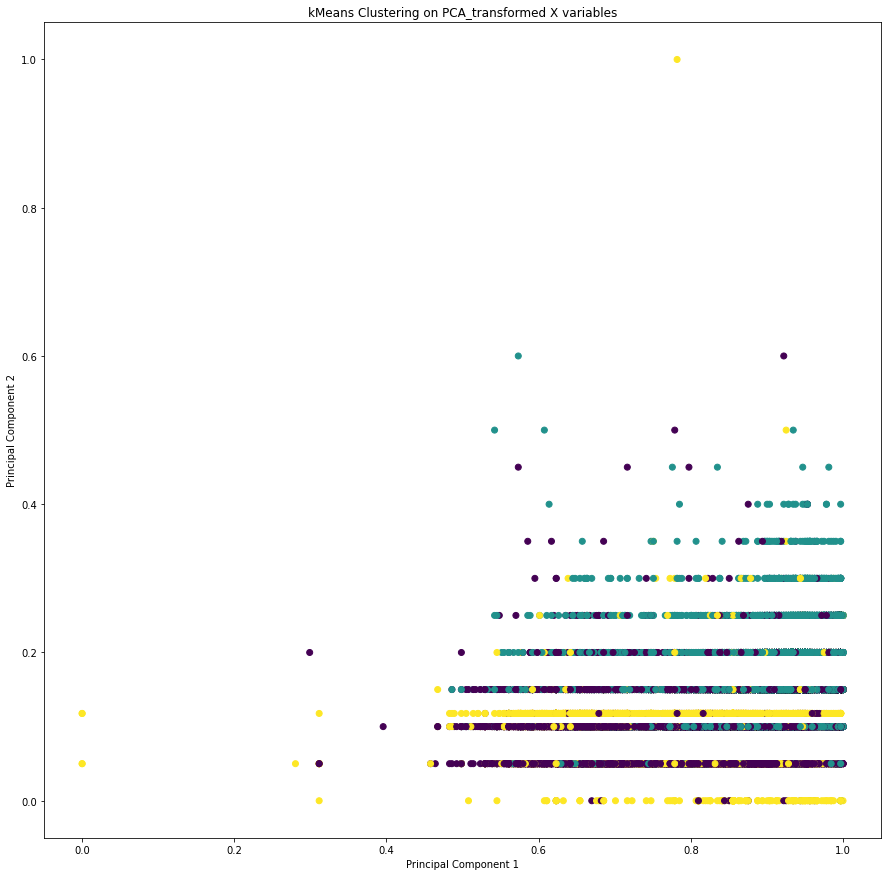

In [ ]:
# https://github.com/tule2236/Airbnb-Dynamic-Pricing-Optimization/blob/master/Preprocess_and_Modeling.ipynb
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=3, random_state=170).fit_predict(X_train)
print(y_pred)
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_pred)
plt.title("kMeans Clustering on PCA_transformed X variables")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Linear Regression

In [ ]:
from sklearn import metrics

def evaluate(predicted, actual):
  # Assuming output is 'ln'

  predicted = np.apply_along_axis(lambda x: np.exp(x), 0, predicted)
  actual = np.apply_along_axis(lambda x: np.exp(x), 0, actual)

  # The baseline predictions are the historical averages
  mn = actual.mean()
  baseline_preds = [mn]*(len(predicted))

  # Baseline errors, and display average baseline error
  baseline_errors = abs(baseline_preds - actual)

  print('Mean (Actual): {:,}'.format(np.mean(actual)))
  print('Mean (Predicted): {:,}'.format(np.mean(predicted)))
  print('Mean Absolute Error: {:,}'.format(metrics.mean_absolute_error(actual, predicted)))
  print('Mean Squared Error: {:,}'.format(metrics.mean_squared_error(actual, predicted)))
  print('Root Mean Squared Error: {:,}'.format(np.sqrt(metrics.mean_squared_error(actual, predicted))))
  print('Average baseline error: ', round(np.mean(baseline_errors), 4))

def create_evaluation(label, predicted, actual):
  predicted = np.apply_along_axis(lambda x: np.exp(x), 0, predicted)
  actual = np.apply_along_axis(lambda x: np.exp(x), 0, actual)

  return {
      'Name': label,
      'Mean (Predicted)': np.mean(predicted),
      'Mean Absolute Error': metrics.mean_absolute_error(actual, predicted),
      'Mean Squared Error': metrics.mean_squared_error(actual, predicted),
      'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(actual, predicted))
  }

def compare(predicted, actual):
  # Assuming output is 'ln'

  revenue_formatter = lambda x: "{:,}".format(np.exp(x))
  # revenue_formatter = lambda x: np.exp(x)

  compare = pd.DataFrame({ 'prediction': predicted, 'actual': actual })
  compare['prediction'] = compare['prediction'].apply(revenue_formatter)
  compare['actual'] = compare['actual'].apply(revenue_formatter)
  
  return compare

def rf_feature_importance(rf, columns):
  feature_importance = pd.DataFrame(
      {'feature': list(columns), 'importance': list(rf.feature_importances_)}
  )

  feature_importance = feature_importance.sort_values('importance', ascending = False)
  feature_importance = feature_importance.set_index('feature')
  return feature_importance

def graph_rf_feature_importance(rf, columns):
  import matplotlib.pyplot as plt
  plt.figure()

  FeatImp = rf_feature_importance(rf, columns)

  plt.title("Feature Importance")
  y_pos = np.arange(len(FeatImp.index[0:30]))
  plt.bar(y_pos,FeatImp['importance'].values[0:30])
  plt.xticks(y_pos, FeatImp.index[0:30],rotation='vertical')
  plt.show()

### Linear Regression

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Used to compare model performance
models = pd.DataFrame(columns=[ 'Name', 'Mean (Predicted)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error' ])

In [ ]:
from sklearn import linear_model

#https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

predictions = lr.predict(X_test)
models = models.append(create_evaluation('Linear Regression (Basic)', predictions, y_test), ignore_index=True)
print(predictions)

[12.58003235 11.8354187  11.58236694 ... 12.99154663 12.78312683
 11.85325623]


In [ ]:
evaluate(predictions, y_test)

Mean (Actual): 304,470.9666866403
Mean (Predicted): 293,640.7050877263
Mean Absolute Error: 63,377.82682156391
Mean Squared Error: 57,826,286,438.44341
Root Mean Squared Error: 240,470.96797418897
Average baseline error:  137321.4751


#### Selected Features

In [ ]:
from sklearn import linear_model

# Lasso
lr = linear_model.LinearRegression()
lr.fit(X_train[chosen_features_lasso],y_train)

predictions = lr.predict(X_test[chosen_features_lasso])
models = models.append(create_evaluation('Linear Regression (Lasso Selection)', predictions, y_test), ignore_index=True)

In [ ]:
evaluate(predictions, y_test)

Mean (Actual): 304,470.9666866403
Mean (Predicted): 292,124.0969906893
Mean Absolute Error: 63,961.850704807825
Mean Squared Error: 18,149,018,080.459644
Root Mean Squared Error: 134,718.29155856915
Average baseline error:  137321.4751


#### PCA

In [ ]:
from sklearn.pipeline import Pipeline

# Find the number of components needed to explain 90% of the variance in the dataset
pca = PCA(0.85).fit(X_train)
pca.n_components_

lr = Pipeline(
  [
    ('PCA', PCA(n_components=pca.n_components_)),
    ('Linear Regression', linear_model.LinearRegression())
  ]
)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
models = models.append(create_evaluation('Linear Regression (PCA)', predictions, y_test), ignore_index=True)

In [ ]:
print(pca.n_components_)

94


In [ ]:
evaluate(predictions, y_test)

Mean (Actual): 304,470.9666866403
Mean (Predicted): 280,372.899764623
Mean Absolute Error: 87,099.39642879296
Mean Squared Error: 27,970,599,175.26995
Root Mean Squared Error: 167,244.13046582518
Average baseline error:  137321.4751


### Random Forest Regression

#### Base

In [ ]:
# Following: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.ensemble import RandomForestRegressor

tunedParameters = [{'n_estimators':100}]

rf = RandomForestRegressor(n_jobs = 1, criterion='mse', n_estimators=100)
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)
models = models.append(create_evaluation('Random Forest (Base)', predictions, y_test), ignore_index=True)

In [ ]:
evaluate(predictions, y_test)

Mean (Actual): 304,470.9666866403
Mean (Predicted): 294,796.3184321881
Mean Absolute Error: 39,504.01558792728
Mean Squared Error: 7,794,756,299.872075
Root Mean Squared Error: 88,287.91706610862
Average baseline error:  137321.4751


In [ ]:
rf_feature_importance(rf, X_train.columns).head(10)

importance
feature                            
annual_taxes               0.524902
built                      0.114993
property_type__lot/land    0.075102
fin_sqft                   0.047101
lat                        0.038197
lot                        0.037536
lng                        0.027996
sell_day                   0.006846
foundation_size            0.006835
sell_month                 0.005481

Error is still large on the Mean Average Predictive Error is still very high, also, feature importance list looks very different.

#### Estimators

In [ ]:
rf = RandomForestRegressor(n_jobs = 1, criterion='mse', n_estimators=150)
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)
models = models.append(create_evaluation('Random Forest (+n_estimators)', predictions, y_test), ignore_index=True)

In [ ]:
evaluate(predictions, y_test)

Mean (Actual): 304,470.9666866403
Mean (Predicted): 294,868.92337835405
Mean Absolute Error: 39,527.091519808266
Mean Squared Error: 7,808,161,503.504676
Root Mean Squared Error: 88,363.80199779023
Average baseline error:  137321.4751


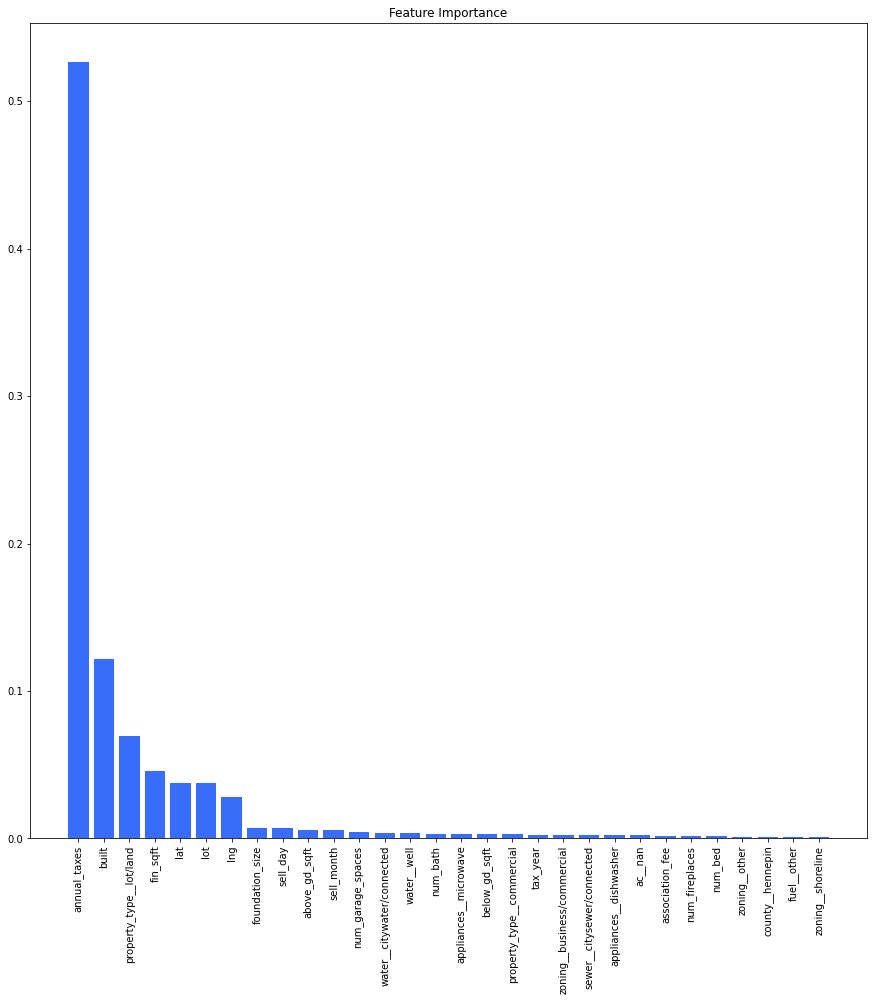

In [ ]:
graph_rf_feature_importance(rf, X_train.columns)

From 100 to 150 n_estimators, the error doesn't seem to change in this dataset

Also, model has about 3.5 times more predicting power than just choosing the average house price as the guess for each house... this is not great, but also not terrible.

**Sources**

https://github.com/tule2236/Airbnb-Dynamic-Pricing-Optimization/blob/master/Preprocess_and_Modeling.ipynb 

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 

https://medium.com/ampersand-academy/random-forest-regression-using-python-sklearn-from-scratch-9ad7cf2ec2bb 


#### Depth

In [ ]:
rf = RandomForestRegressor(n_jobs = 1, criterion='mse', n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)
models = models.append(create_evaluation('Random Forest (+max_depth)', predictions, y_test), ignore_index=True)

In [ ]:
evaluate(predictions, y_test)

Mean (Actual): 304,470.9666866403
Mean (Predicted): 292,787.03318628436
Mean Absolute Error: 47,025.647728193086
Mean Squared Error: 9,113,739,987.186611
Root Mean Squared Error: 95,465.91007886853
Average baseline error:  137321.4751


Max depth also doesn't increase prediction, so we most likely arent dealing with overfitting

#### GridSearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100, 150]
max_depth = [10, None]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}

rf_random = RandomizedSearchCV(
  estimator=rf,
  param_distributions=random_grid,
  n_iter=100,
  cv=3,
  verbose=2,
  random_state=0,
  n_jobs = -1
)

rf_random.fit(X_train, y_train)
predictions = rf_random.predict(X_test)
models = models.append(create_evaluation('Random Forest (Grid Search)', predictions, y_test), ignore_index=True)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 46.6min finished


In [ ]:
evaluate(predictions, y_test)

Mean (Actual): 304,470.9666866403
Mean (Predicted): 294,811.3731826908
Mean Absolute Error: 39,479.369063536695
Mean Squared Error: 7,726,874,662.177695
Root Mean Squared Error: 87,902.64308982805
Average baseline error:  137321.4751


In [ ]:
rf_feature_importance(rf_random.best_estimator_, X_train.columns)

importance
feature                                                
annual_taxes                               5.297890e-01
built                                      1.201476e-01
property_type__lot/land                    6.667516e-02
fin_sqft                                   4.561001e-02
lat                                        3.782000e-02
...                                                 ...
handicap__accessibleforhearing-impairment  2.635177e-07
handicap__sightimpaired                    1.083068e-07
heating__none                              7.346862e-08
handicap__none                             2.547679e-12
dining__living/dinin                       0.000000e+00

[391 rows x 1 columns]

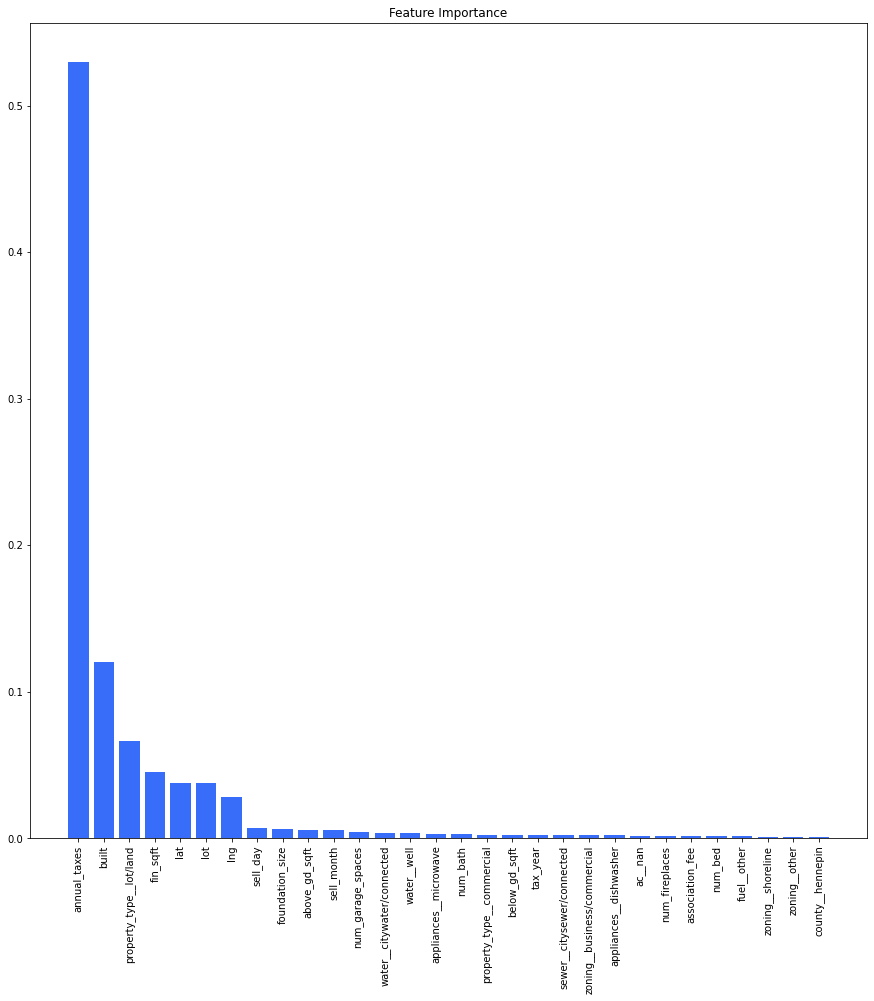

In [ ]:
graph_rf_feature_importance(rf_random.best_estimator_, X_train.columns)

In [ ]:
%%script false
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

from sklearn import tree
from sklearn.tree import export_graphviz

# Export as dot file
# export_graphviz(rf_random.best_estimator_.estimators_[5], out_file='tree.dot',
export_graphviz(rf_random.best_estimator_.estimators_[5], out_file='tree.png',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [ ]:
%%script false
!dot -Tpng tree.dot -o tree.png

In [ ]:
%%script false
import matplotlib.image as mpimg
img = mpimg.imread('./tree.png')
imgplot = plt.imshow(img)
plt.show()

### Elastic-Net

In [ ]:
from sklearn.linear_model import ElasticNet 

el = ElasticNet(alpha = .03, l1_ratio = .05, max_iter = 2000)
el.fit(X_train, y_train)

predictions = el.predict(X_test)
models = models.append(create_evaluation('Elastic-Net', predictions, y_test), ignore_index=True)

In [ ]:
evaluate(predictions, y_test)

Mean (Actual): 304,470.9666866403
Mean (Predicted): 274,180.07165550685
Mean Absolute Error: 80,210.78298315343
Mean Squared Error: 26,660,574,115.247498
Root Mean Squared Error: 163,280.6605671581
Average baseline error:  137321.4751


### Xgboost

In [ ]:
# https://github.com/jjone36/tmdb/blob/master/04.modeling/ex_1.ipynb
import xgboost as xgb

xg = xgb.XGBRegressor(objective = 'reg:linear',
                            max_depth = 7, 
                            learning_rate = 0.01, 
                            n_estimators = 10000, 
                            early_stopping_rounds = 200,
                            gamma = 1.5,  
                            silent = True,
                            subsample = 0.7, 
                            colsample_bytree = 0.7, 
                            colsample_bylevel = 0.5)
xg.fit(X_train, y_train)

predictions = xg.predict(X_test)
models = models.append(create_evaluation('Xgboost', predictions, y_test), ignore_index=True)

In [ ]:
evaluate(predictions, y_test)

Mean (Actual): 304,470.9666866403
Mean (Predicted): 297,135.21875
Mean Absolute Error: 38,121.84330717479
Mean Squared Error: 7,385,570,486.746458
Root Mean Squared Error: 85,939.34190314967
Average baseline error:  137321.4751


### Neural Network

In [ ]:
X_val, X_lim_test, y_val, y_lim_test = train_test_split(
    X_test,
    y_test,
    random_state=0,
    train_size=0.5
)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# From: https://github.com/jjone36/tmdb/blob/master/04.modeling/ex_1.ipynb
output_dim = 1
nn = Sequential()
nn.add(Dense(output_dim, input_dim=X_train.shape[1], activation = 'linear'))
nn.add(Dense(output_dim, activation = 'linear'))
nn.add(Dense(output_dim)) 

nn.compile(optimizer = 'adam', 
              loss = 'mse', 
              metrics = ['mean_squared_logarithmic_error'])

early_stopper = EarlyStopping(monitor='val_loss', patience=5)

result = nn.fit(X_train, y_train, 
                 batch_size = 100,
                 epochs = 50,
                 callbacks = [early_stopper],
                validation_data=(X_val, y_val),
                verbose=0)

predictions = nn.predict(X_lim_test)
models = models.append(create_evaluation('Neural Network', predictions, y_lim_test), ignore_index=True)

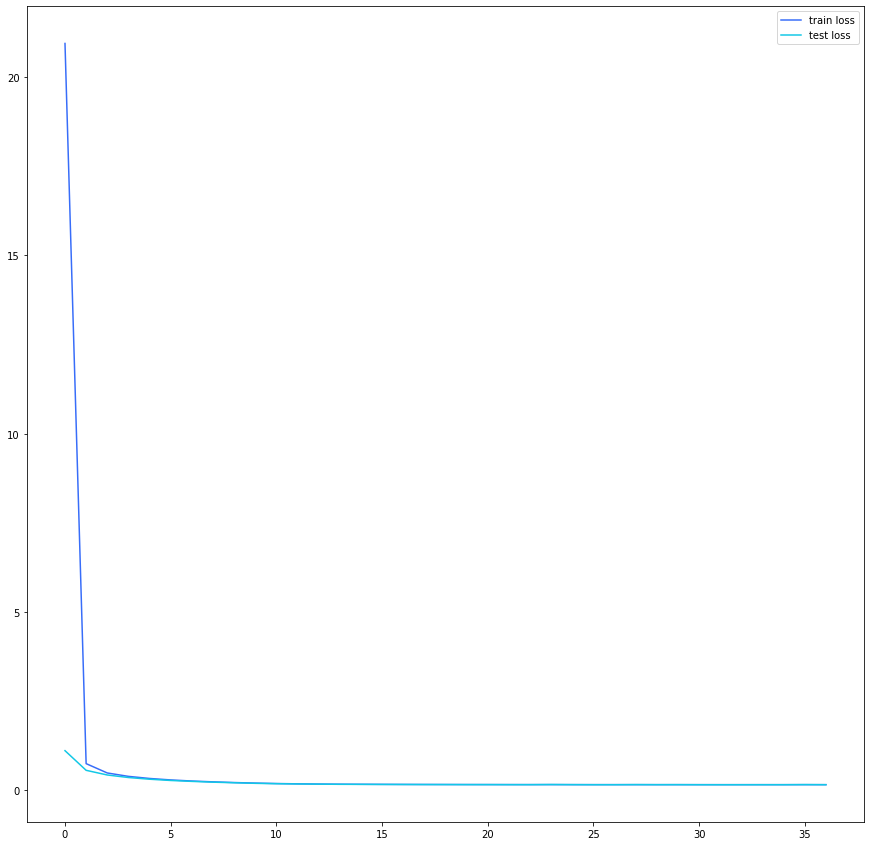

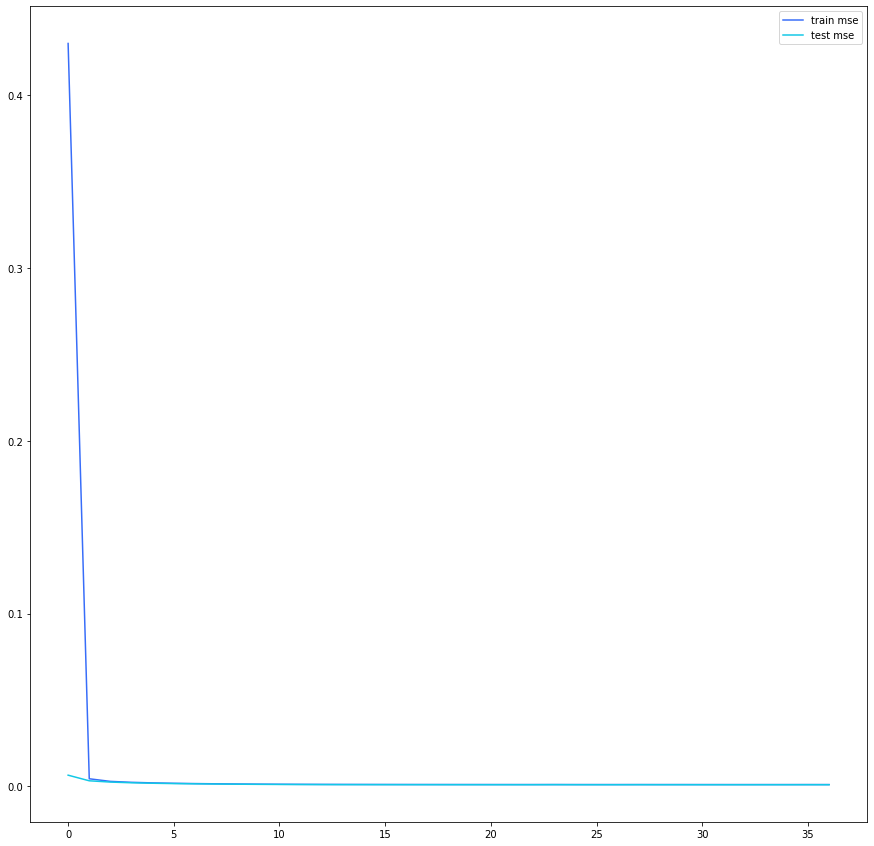

In [ ]:
plt.plot(result.history['loss'], label = 'train loss')
plt.plot(result.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

plt.plot(result.history['mean_squared_logarithmic_error'], label = 'train mse')
plt.plot(result.history['val_mean_squared_logarithmic_error'], label = 'test mse')
plt.legend()
plt.show()

In [ ]:
evaluate(predictions, y_lim_test)

Mean (Actual): 304,060.53700508695
Mean (Predicted): 305,111.4375
Mean Absolute Error: 65,344.0288993753
Mean Squared Error: 16,137,334,979.224586
Root Mean Squared Error: 127,032.81064049786
Average baseline error:  136574.6183


### Compare

In [ ]:
models.sort_values(by='Root Mean Squared Error')

Name  ...  Root Mean Squared Error
8                              Xgboost  ...             85939.341903
6          Random Forest (Grid Search)  ...             87902.643090
3                 Random Forest (Base)  ...             88287.917066
4        Random Forest (+n_estimators)  ...             88363.801998
5           Random Forest (+max_depth)  ...             95465.910079
9                       Neural Network  ...            127032.810640
1  Linear Regression (Lasso Selection)  ...            134718.291559
7                          Elastic-Net  ...            163280.660567
2              Linear Regression (PCA)  ...            167244.130466
0            Linear Regression (Basic)  ...            240470.967974

[10 rows x 5 columns]

The Xgboost bmodel performs better than the prior well-performing random forest model, even with hyperparameter tuning for the random forest model.

The RMSE was 85,939.34. Our predictions are not great but can provide a rough estimate.

## Conclusions

### Summary

Using the data scraped from the MLS Online site, we engineered descriptive features related to the home. Basic exploratory data analysis found trends in the listings across the Twin Cities, including clusters of older homes, the distribution of property types, and general trends for home sale prices.

Real estate agents may find our analysis useful far targetting advertising, looking in areas with higher value homes or with specific property types. From there, real estate agents can use our model for predicting sale prices.

We developed a model for predicting home sale prices using these engineered features. The model selection pool found XGboost as the model with the least error for predictions. Future home sale prices can be predicted for a baseline estimate on the price using the home's features.

We believe a real estate agent or home seller would find this prediction useful in finding an easy estimate for the home value.

### Recommendations

Future development may include further investigation into which are most useful for predicting the home sale price. We attempted basic feature selection and used methods with automatic feature selection, but believe further analysis could uncover more useful predictive models using machines with more power.

Also, a further exploratory analysis could uncover trends across time or for different features, such as handicap accessible options or school districts. A real estate agent may find it useful to search listings based on different criteria, such as limited school districts, and re-run analysis on this smaller pool.